# Benjamin Garneau 
# BME 362
# Project: diagnosis and clinical decision using bio-signal processing and machine learning


# This project is to start to learn the beginning steps of signal processing by analyzing an ECG signal using the computing language python. The first step below shows code and a plot of specific data given for a 12 lead ECG recording. This data is plotted using python and displayed using python commands to create a better visual looking graphic for easier and further analysis.

12 lead ECG signals: the recording frequency is 500Hz. It means it's 500 points per second

Please see the detail description of the data here:

https://moody-challenge.physionet.org/2020/


# Step 1 (due 04/07; 20 points): Bio-signal Load, Plot, Visual Inspection, Power Spectral Density

# Importing paths for directory locations. Below I will find what path the code is trying to import the data it will use.

In [1]:
import os 

In [2]:
os.getcwd()

'C:\\Users\\benja'

# It seem the wrong location is being using to get the data so I will change this to the right location.

In [3]:
os.chdir('C:\\Users\\benja\\OneDrive\\Desktop\\FinalProject')

In [4]:
os.getcwd()

'C:\\Users\\benja\\OneDrive\\Desktop\\FinalProject'

# The current directory is now updated and will take information from the proper folder location on my computer. 

In [5]:
# loading the necessary libraries; please spend time to figure our why we are using these libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from os.path import dirname, join as pjoin
import scipy.io as sio

# The above code is importing certian libraries and data to be used to run and plot the code.

In [6]:
# based on the assigned list for the class, choose the number of your own patient here.
patient_number = 14

# it seems lead 9 (as a single channel) is easier to analyze
ECG_lead = 9

# load the "mat" file into our Python
datapass = './Data'
if patient_number < 10:
    patient_name = 'A000' + str(patient_number)
else:
    patient_name = 'A00' + str(patient_number)
filename = patient_name + '.mat'
mat_fname = pjoin(datapass, filename)

mat_contents = sio.loadmat(mat_fname)
val = mat_contents['val']

# The above cell given the patient number 14, and ECG lead 14, loads the corresponding mat file using concatination with the given data using an if-else satement to grab the correct file and stores the data to the variable "val".

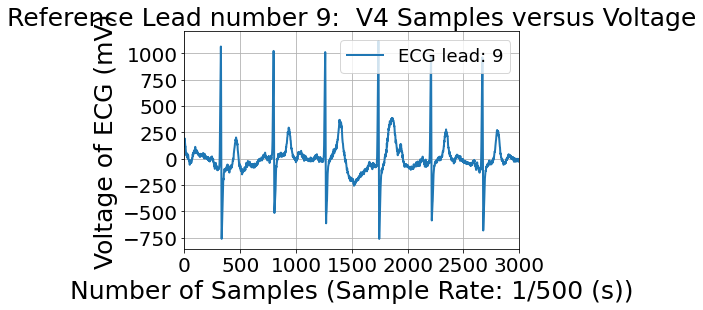

In [7]:
# these are the names of ECG leads 
ECG_lead_names = ['I','II','III','aVR','aVL','aVF','V1','V2','V3','V4','V5','V6']

# plot your ECG for the first 2000 points (samples)
plt.plot(val[ECG_lead][0:3000], linewidth = 2)
plt.title('Reference Lead number 9:  ' + ECG_lead_names[ECG_lead] + ' Samples versus Voltage', fontsize = 25)
plt.xlabel('Number of Samples (Sample Rate: 1/500 (s))', fontsize = 25)
plt.ylabel('Voltage of ECG (mV)', fontsize= 25)
plt.xlim([0,3000])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(['ECG lead: 9'], loc='best', prop={'size': 18})
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 200 
plt.grid()
plt.show()

# The above code shows data form patient 14 plotted. The plot is the sample rate (of the first 3000 sample points) versus the voltage in mV. 

# Shown in the above code is the plot of the specific ECG values versus the sample rate. The linewidth was increased slightly for better visual. The title, x and y label are detailed and the fontsize is changed for better appearence. The x and y ticks, or the values on the axes, are increased in size. The legend was added to specific the specific ECG lead number used, since other leads can be used in future plots. The figure size was increased and a grid was added for further visual enhancement.

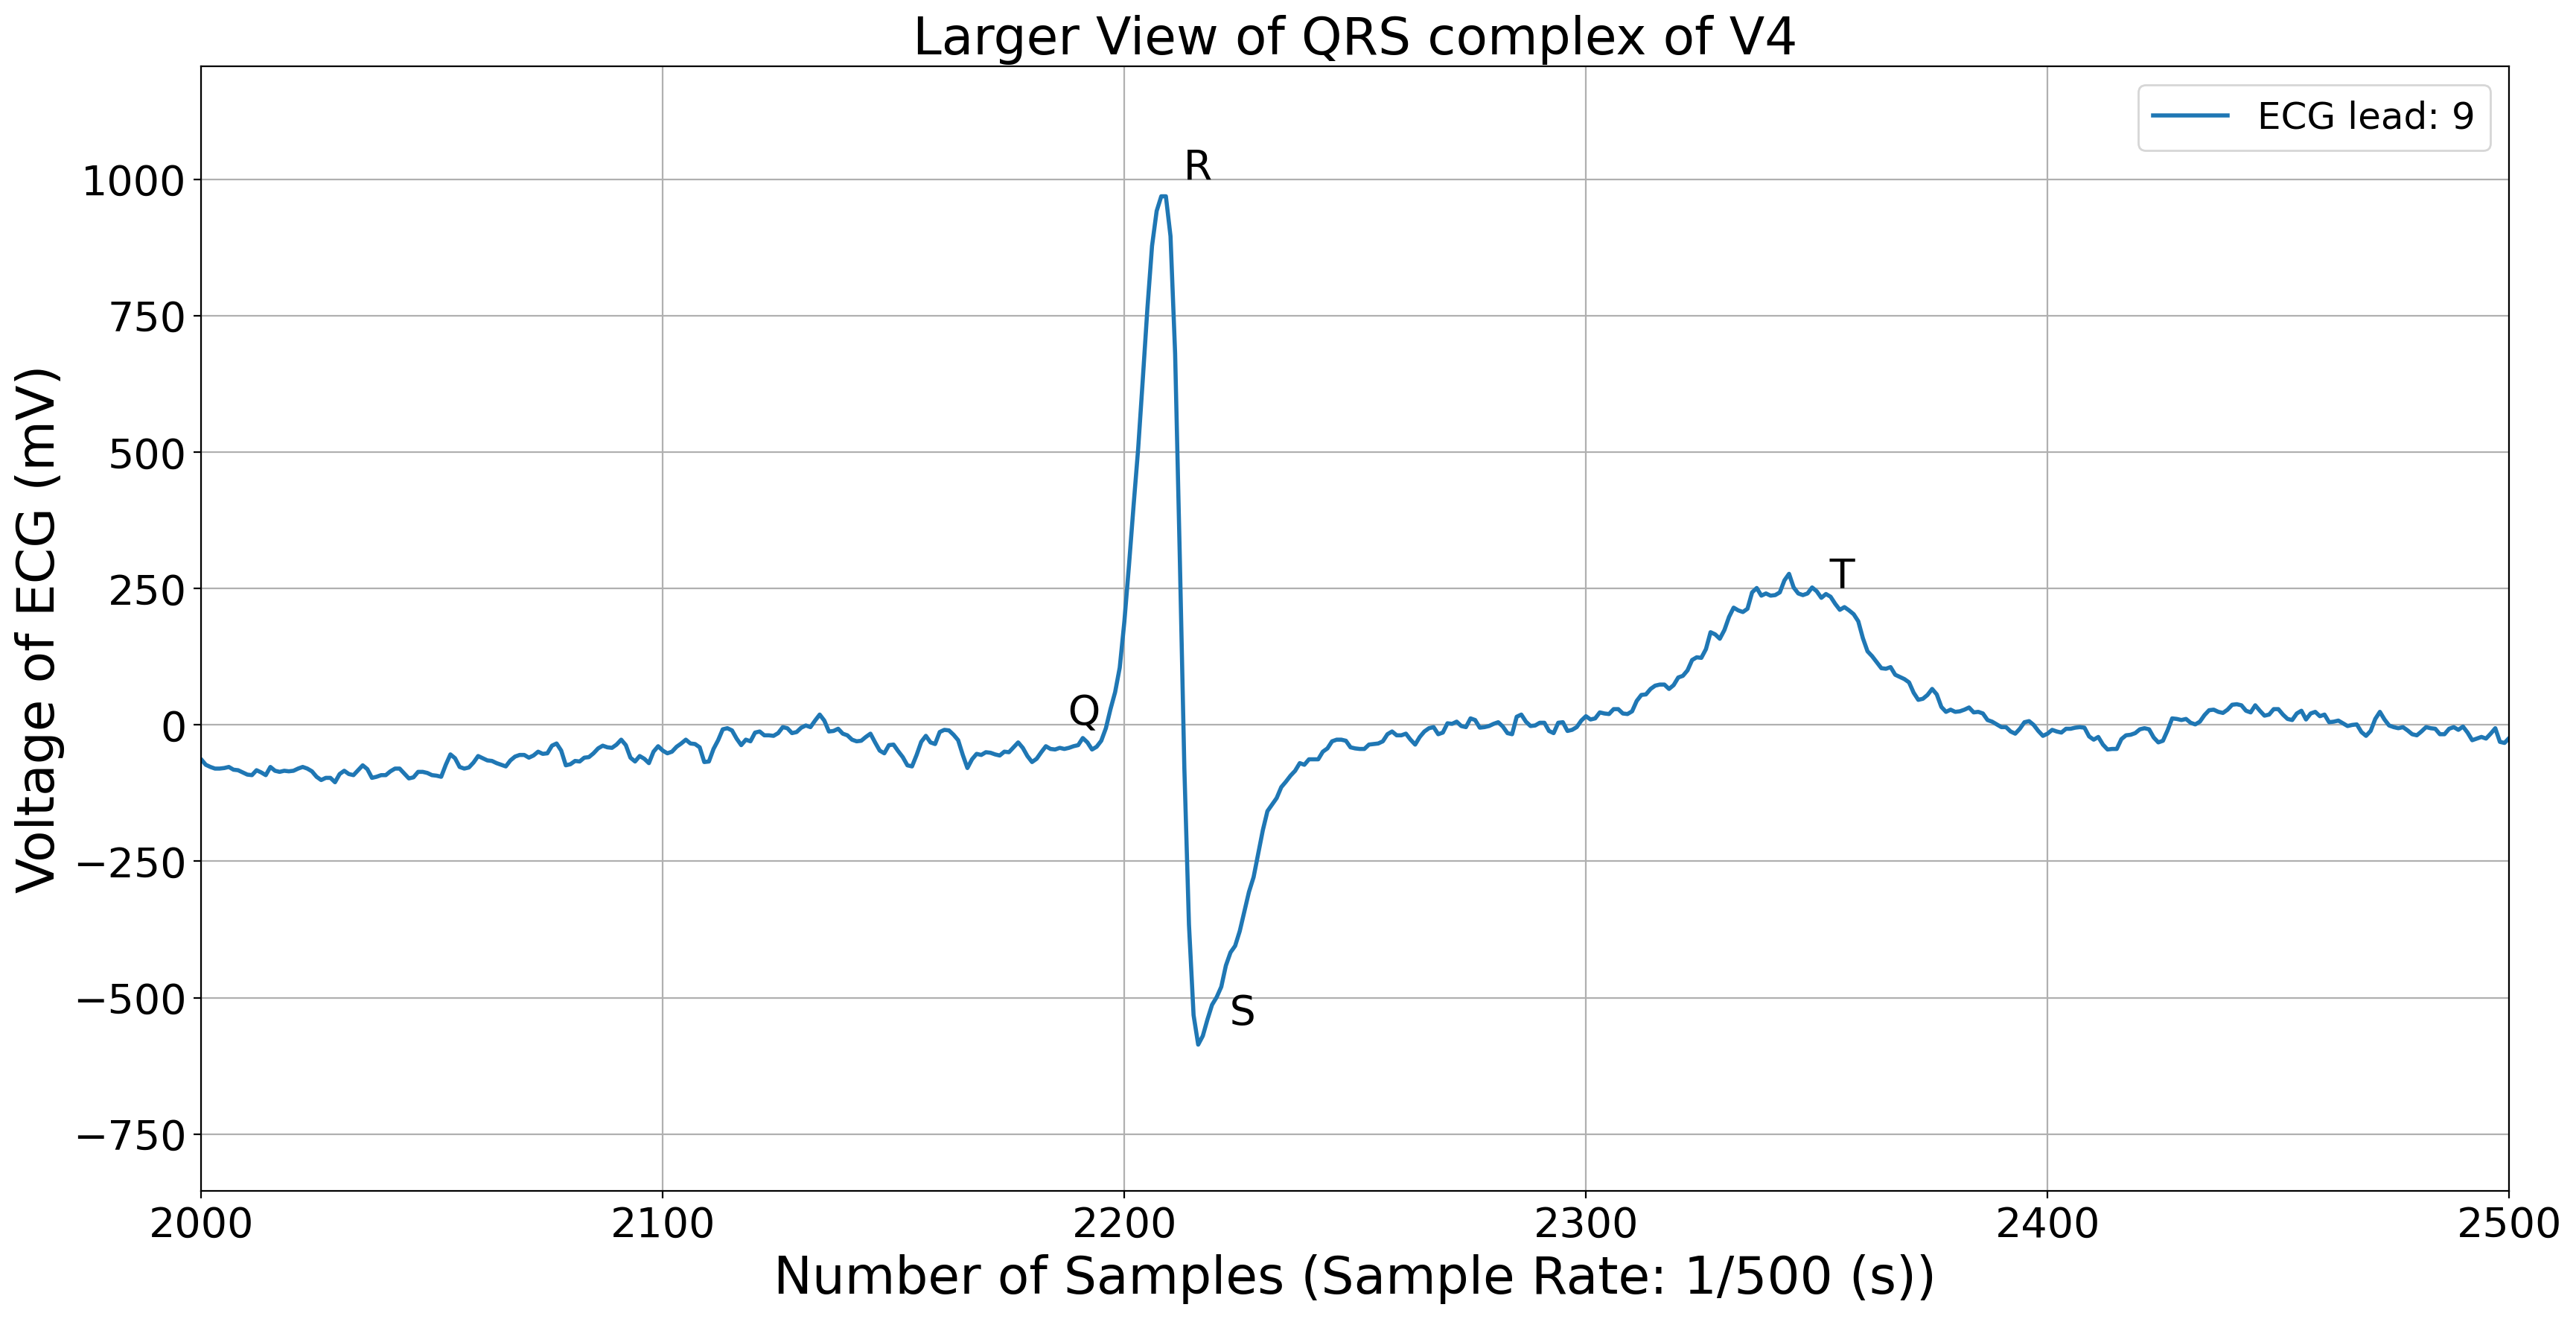

In [8]:
plt.plot(val[ECG_lead][0:3000], linewidth = 2)
plt.title('Larger View of QRS complex of '  + ECG_lead_names[ECG_lead] , fontsize = 25)
plt.xlabel('Number of Samples (Sample Rate: 1/500 (s))', fontsize = 25)
plt.ylabel('Voltage of ECG (mV)', fontsize= 25)
plt.xlim([2000,2500])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(['ECG lead: 9'], loc='best', prop={'size': 18})
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 200 
plt.text(2185,0, ' Q ', fontsize = 20)
plt.text(2210,1000, ' R ', fontsize = 20)
plt.text(2220,-550, ' S ', fontsize = 20)
plt.text(2350,250, ' T ', fontsize = 20)
plt.grid()
plt.show()

# This expanded figure shows a better view (including labels for the QRS complex) where there seems to a abnonrmality with the ECG. There seems to be no P wave present, which is consistent with an atrial fibrilation disorder in patients. The depolarization of the atria is not occuring or is not seen on this ECG.

# The above code is and attempt of using the Welch method to estimate the Power Spectral Density of the data in lead 9 and graphing that using a logarithmic scale for frequency and plotting it against Power. There seems to be an error witht the power scale and I will continue to work on this issue.

# Step 2: Pre-processing: Noise Rejection, Analog Filters

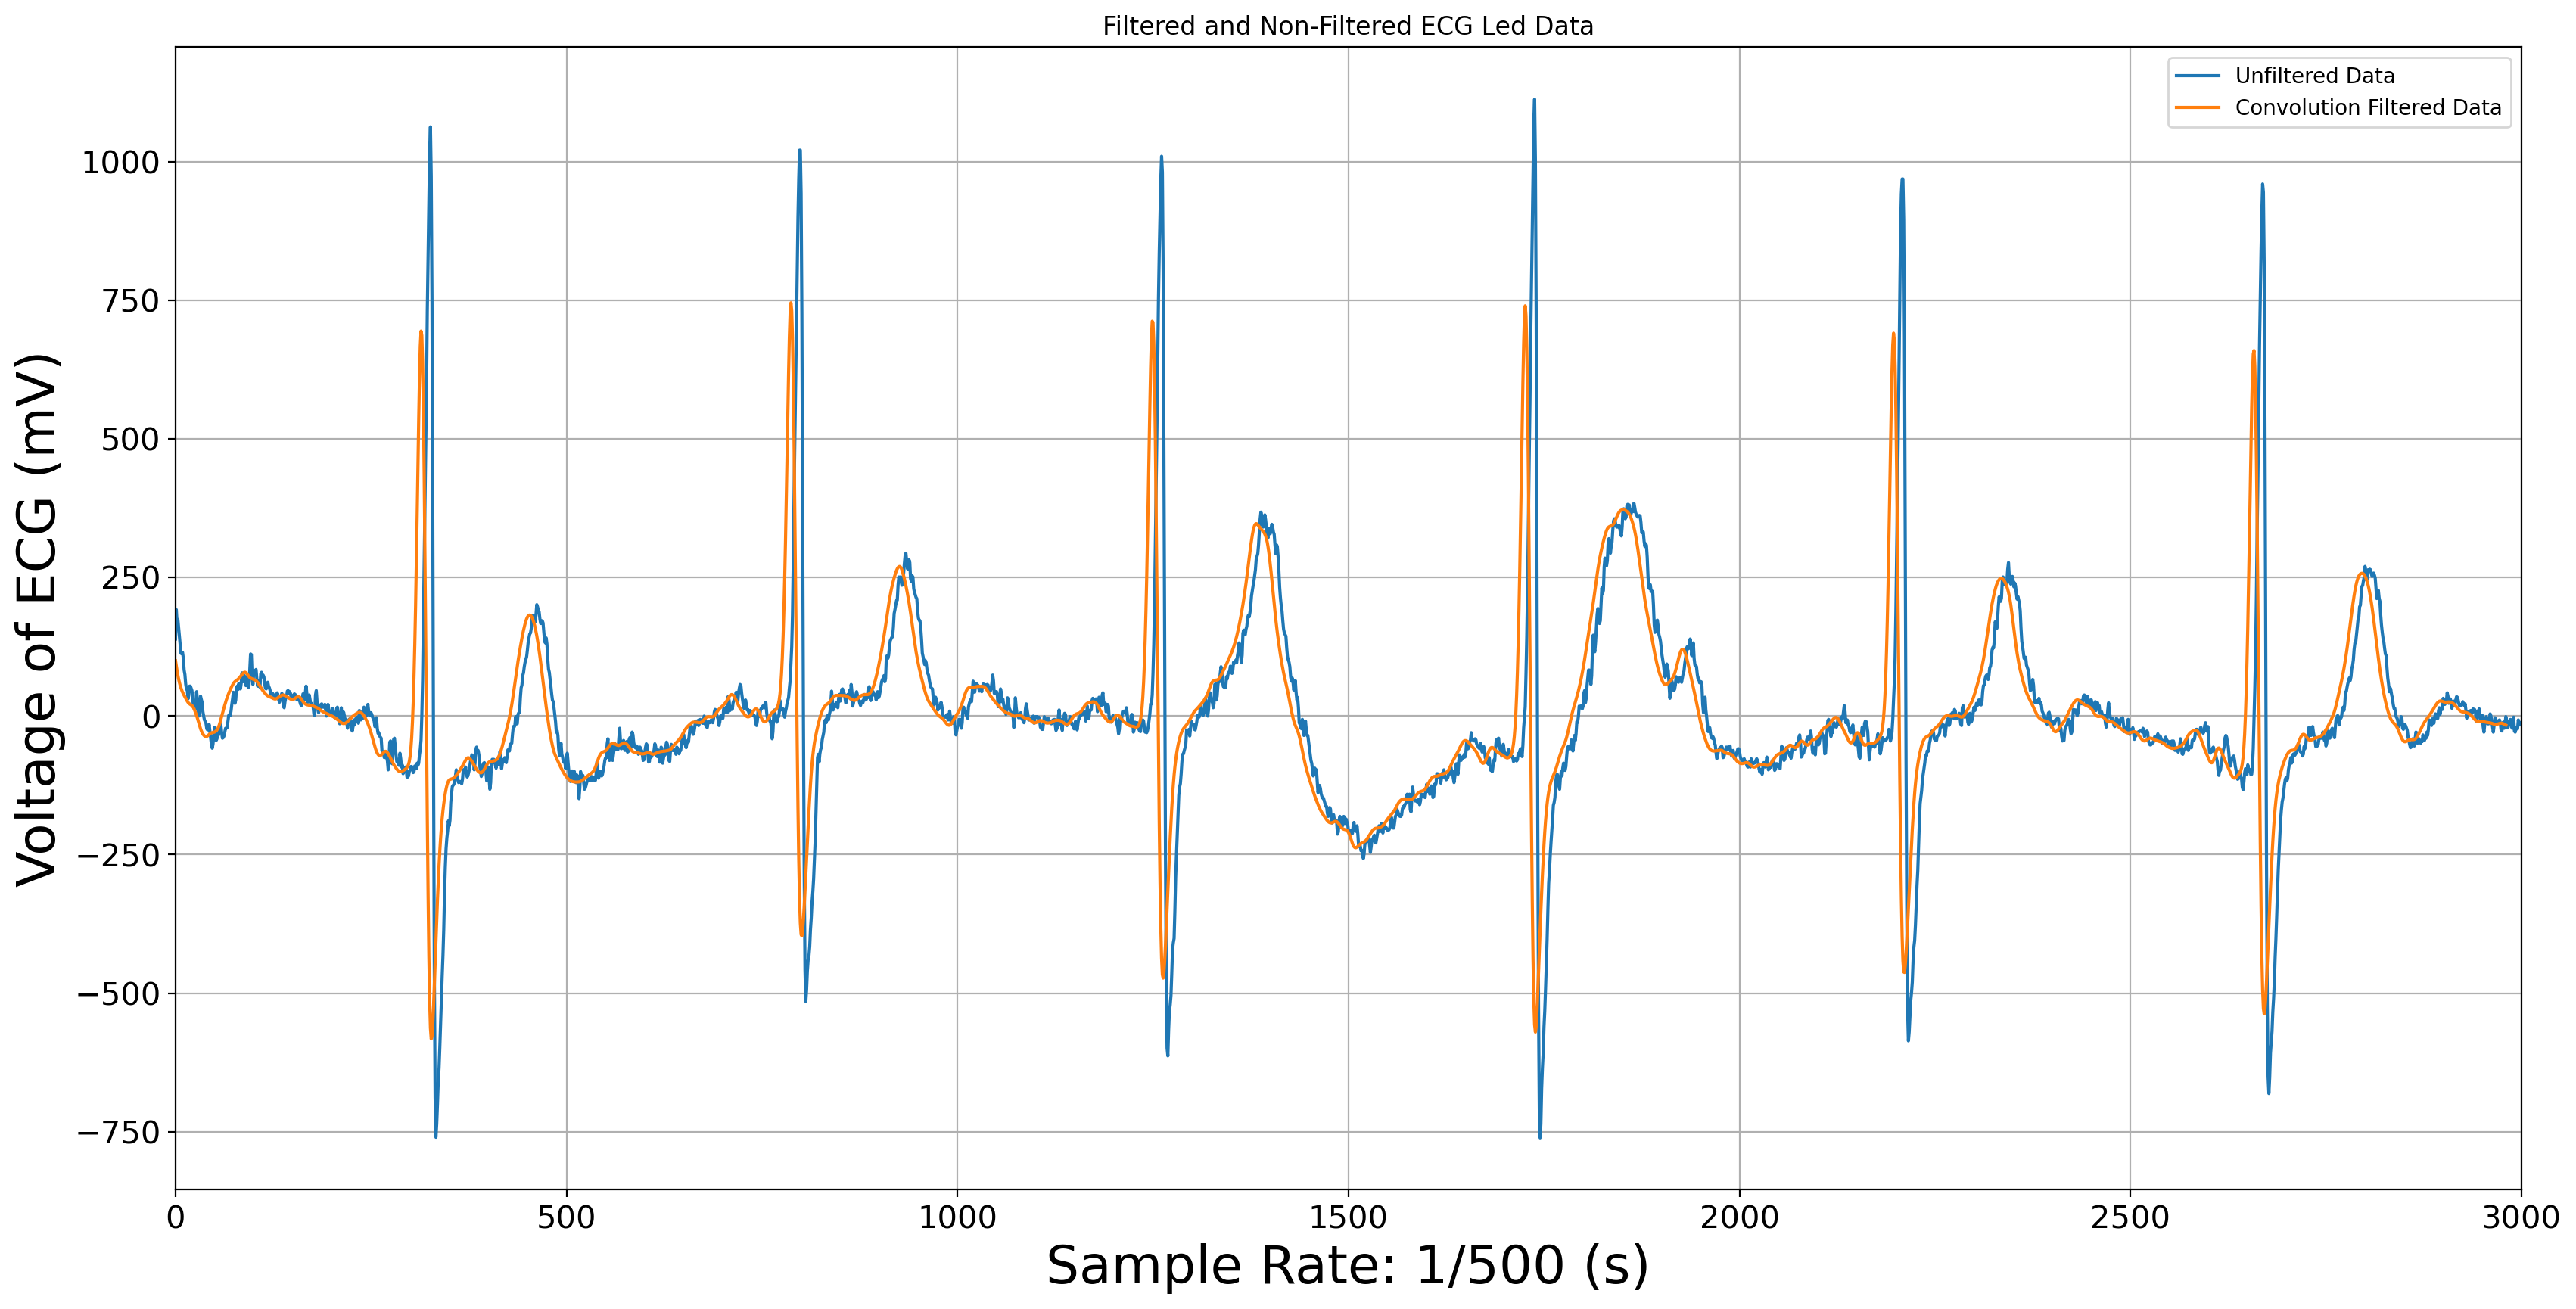

In [9]:
import scipy.signal
from scipy.signal import lfilter, lfilter_zi, filtfilt, butter
from scipy import signal

data = val[ECG_lead][0:3000] # setting the ECG led data equal to a valarialbe for ease of use

# create a normalized Hanning window -- this results in filtered signal that lags behind the origianl data (phase shift)
windowSize = 20
window = np.hanning(windowSize)
window = window / window.sum()

# filter the data using convolution
filtered = np.convolve(window, val[ECG_lead][0:3000], mode='valid')

plt.plot(val[ECG_lead][0:3000], label = 'Unfiltered Data') #plotting the unfilterned data
plt.plot(filtered, label = 'Convolution Filtered Data') #plot the filtered data achieved through convolution
plt.title("Filtered and Non-Filtered ECG Led Data")
plt.xlabel('Sample Rate: 1/500 (s)', fontsize = 25)
plt.ylabel('Voltage of ECG (mV)', fontsize= 25)
plt.xlim([0,3000])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(loc='best') 
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200 
plt.grid()
plt.show()


# Below is a zoom in version of the graph above to give a better in depth view of how the code is filtering the original data and how different they look.

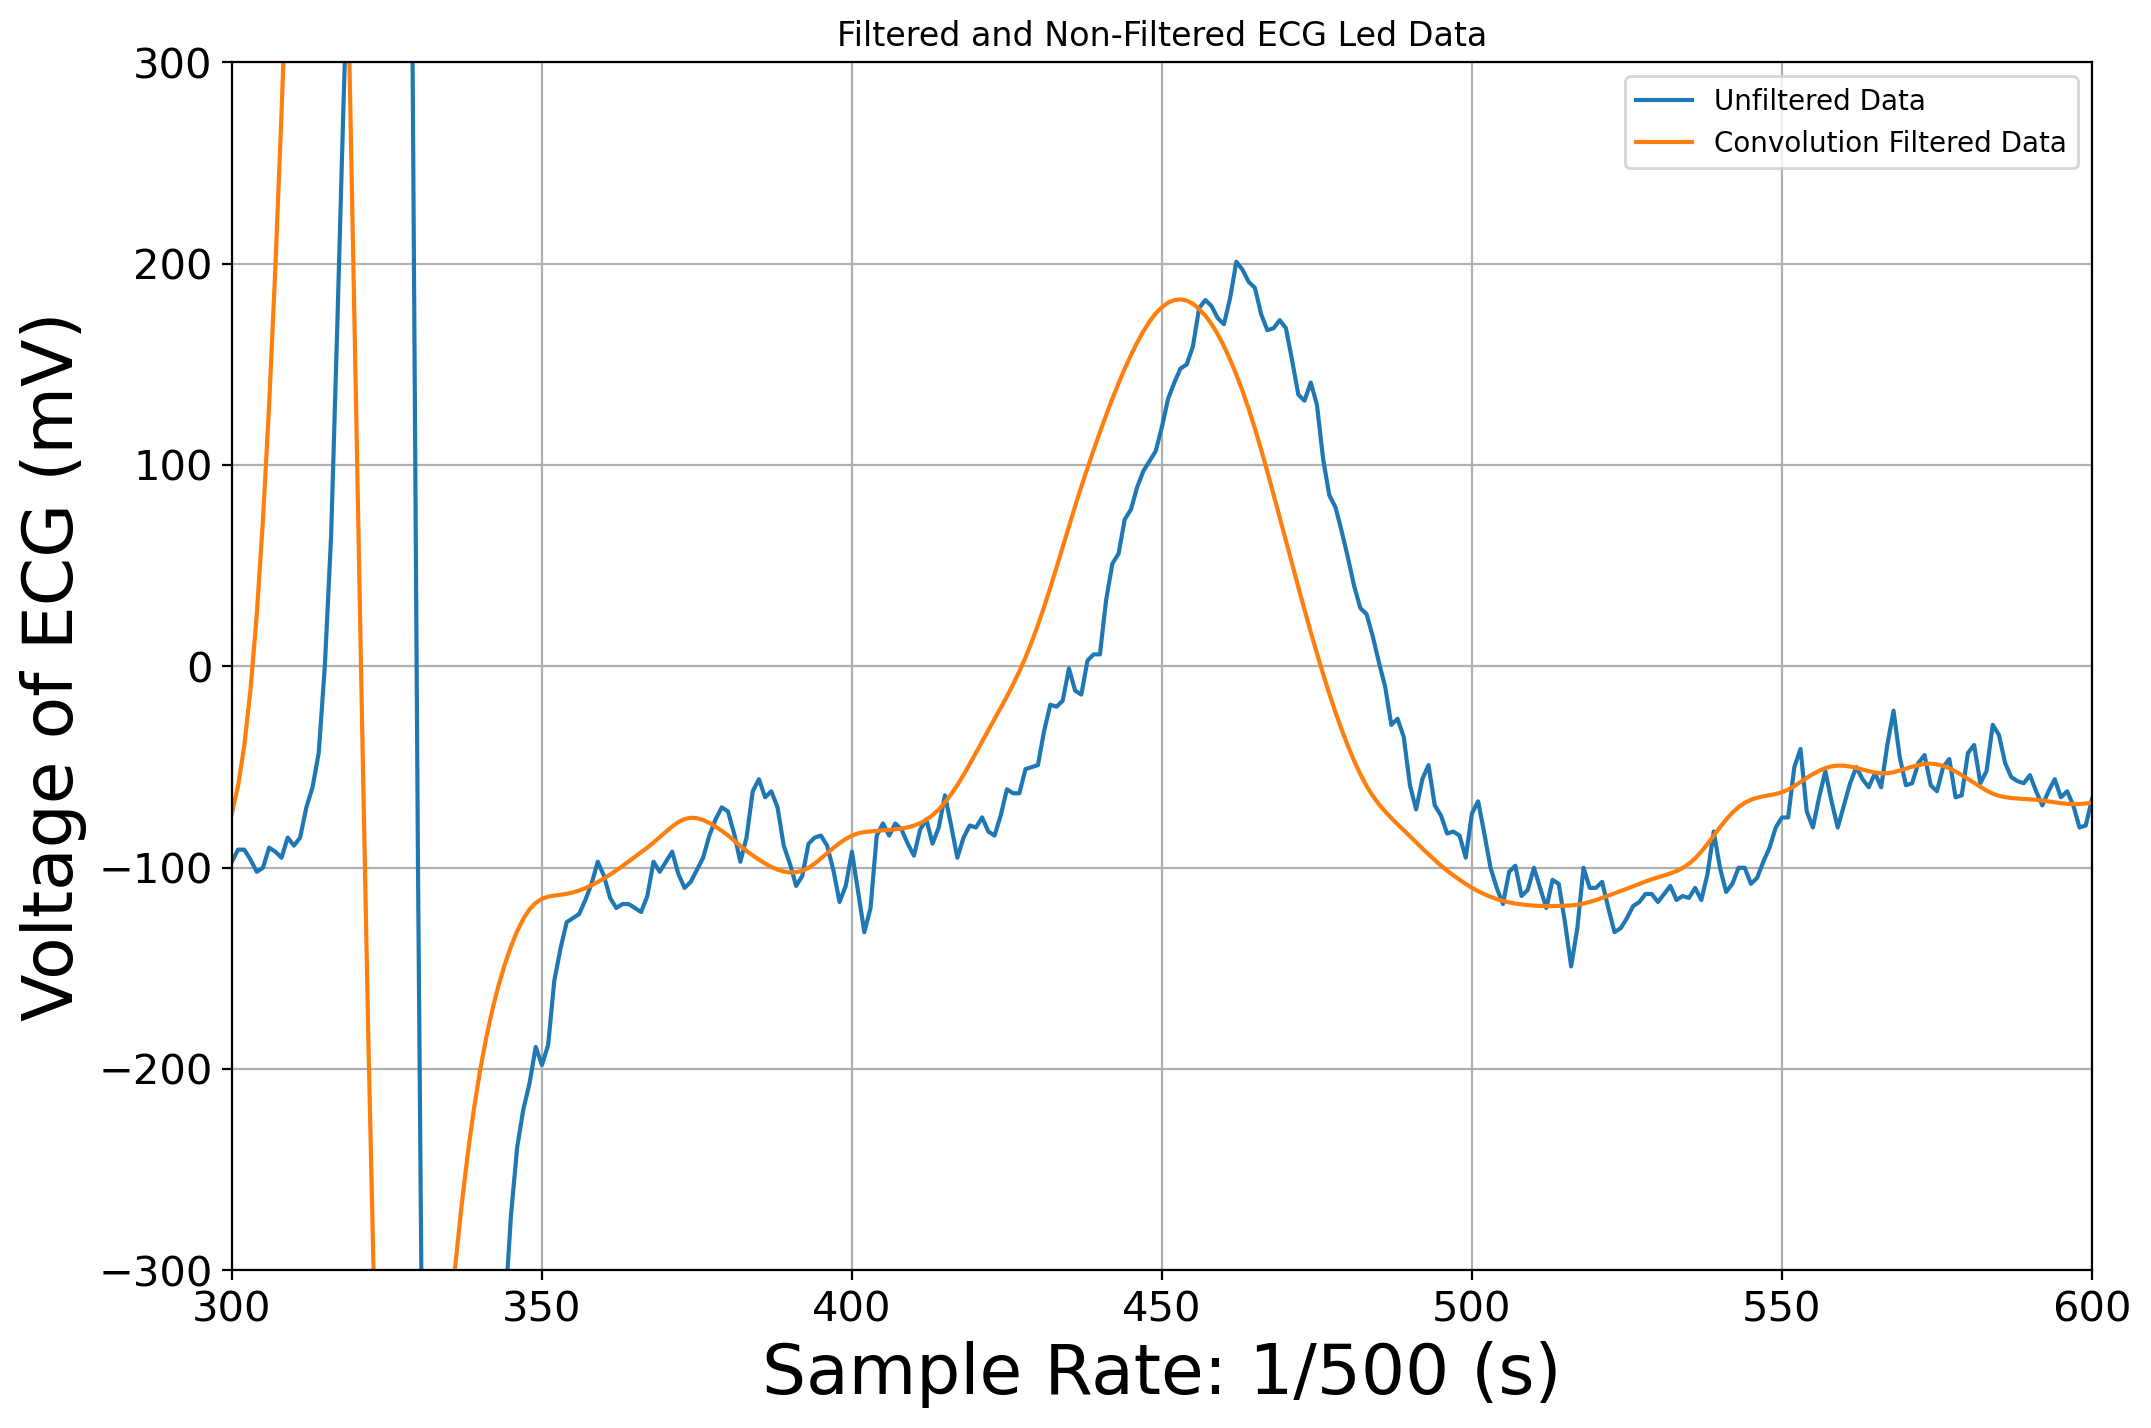

In [10]:
plt.plot(val[ECG_lead][0:3000], label = 'Unfiltered Data') #plotting the unfilterned data
plt.plot(filtered, label = 'Convolution Filtered Data') #plot the filtered data achieved through convolution
plt.title("Filtered and Non-Filtered ECG Led Data")
plt.xlabel('Sample Rate: 1/500 (s)', fontsize = 25)
plt.ylabel('Voltage of ECG (mV)', fontsize= 25)
plt.xlim([300,600])
plt.ylim([-300,300])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(loc='best') 
plt.grid()
plt.show()

# The above result shows the original ECG signal and a superimposed filtered signal that was achieved through convolution of the orignal data samples and a Hanning Window. The result is a filtered signal that is lagging behind the orignal signal (phase-shifted). Below is just the Hanning Window plotted. This is essentially a cut off sinc function since a sinc function will extend to infinity but the windowing cuts it off and now it can be convolved with the ECG signal.

# Below is the Hanning window, which is used for convolution to create the band pass filter. It is a sinc funtion that has a limit to the x-axis. Since the sinc funtion is the Z-transform of a rectangle function (or a band pass filter), this is used to create the filter used for filtering the original signal.

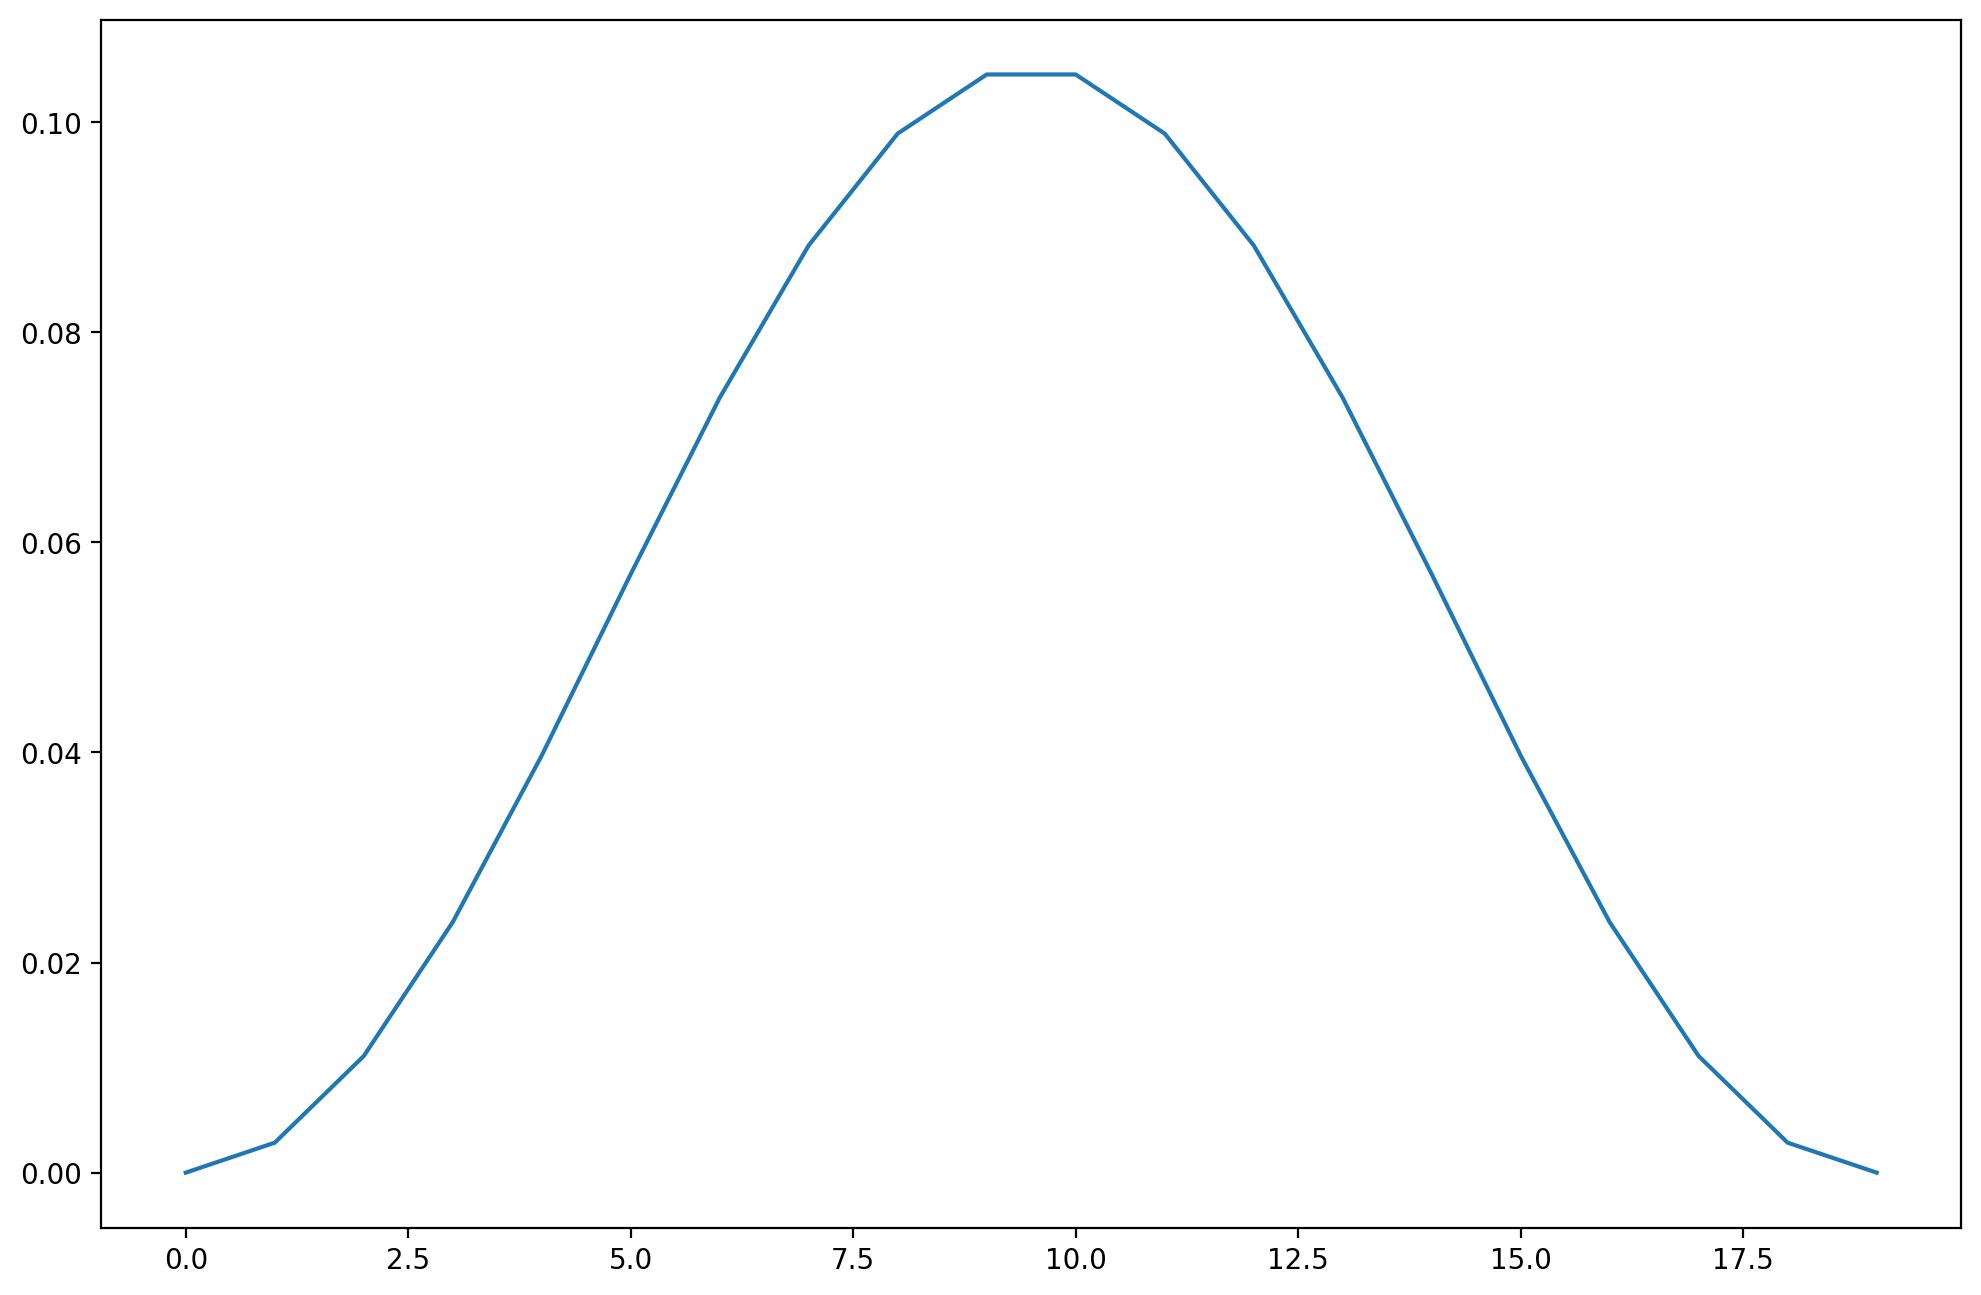

In [11]:
windowSize = 20
window = np.hanning(windowSize)
window = window / window.sum()

plt.plot(window)

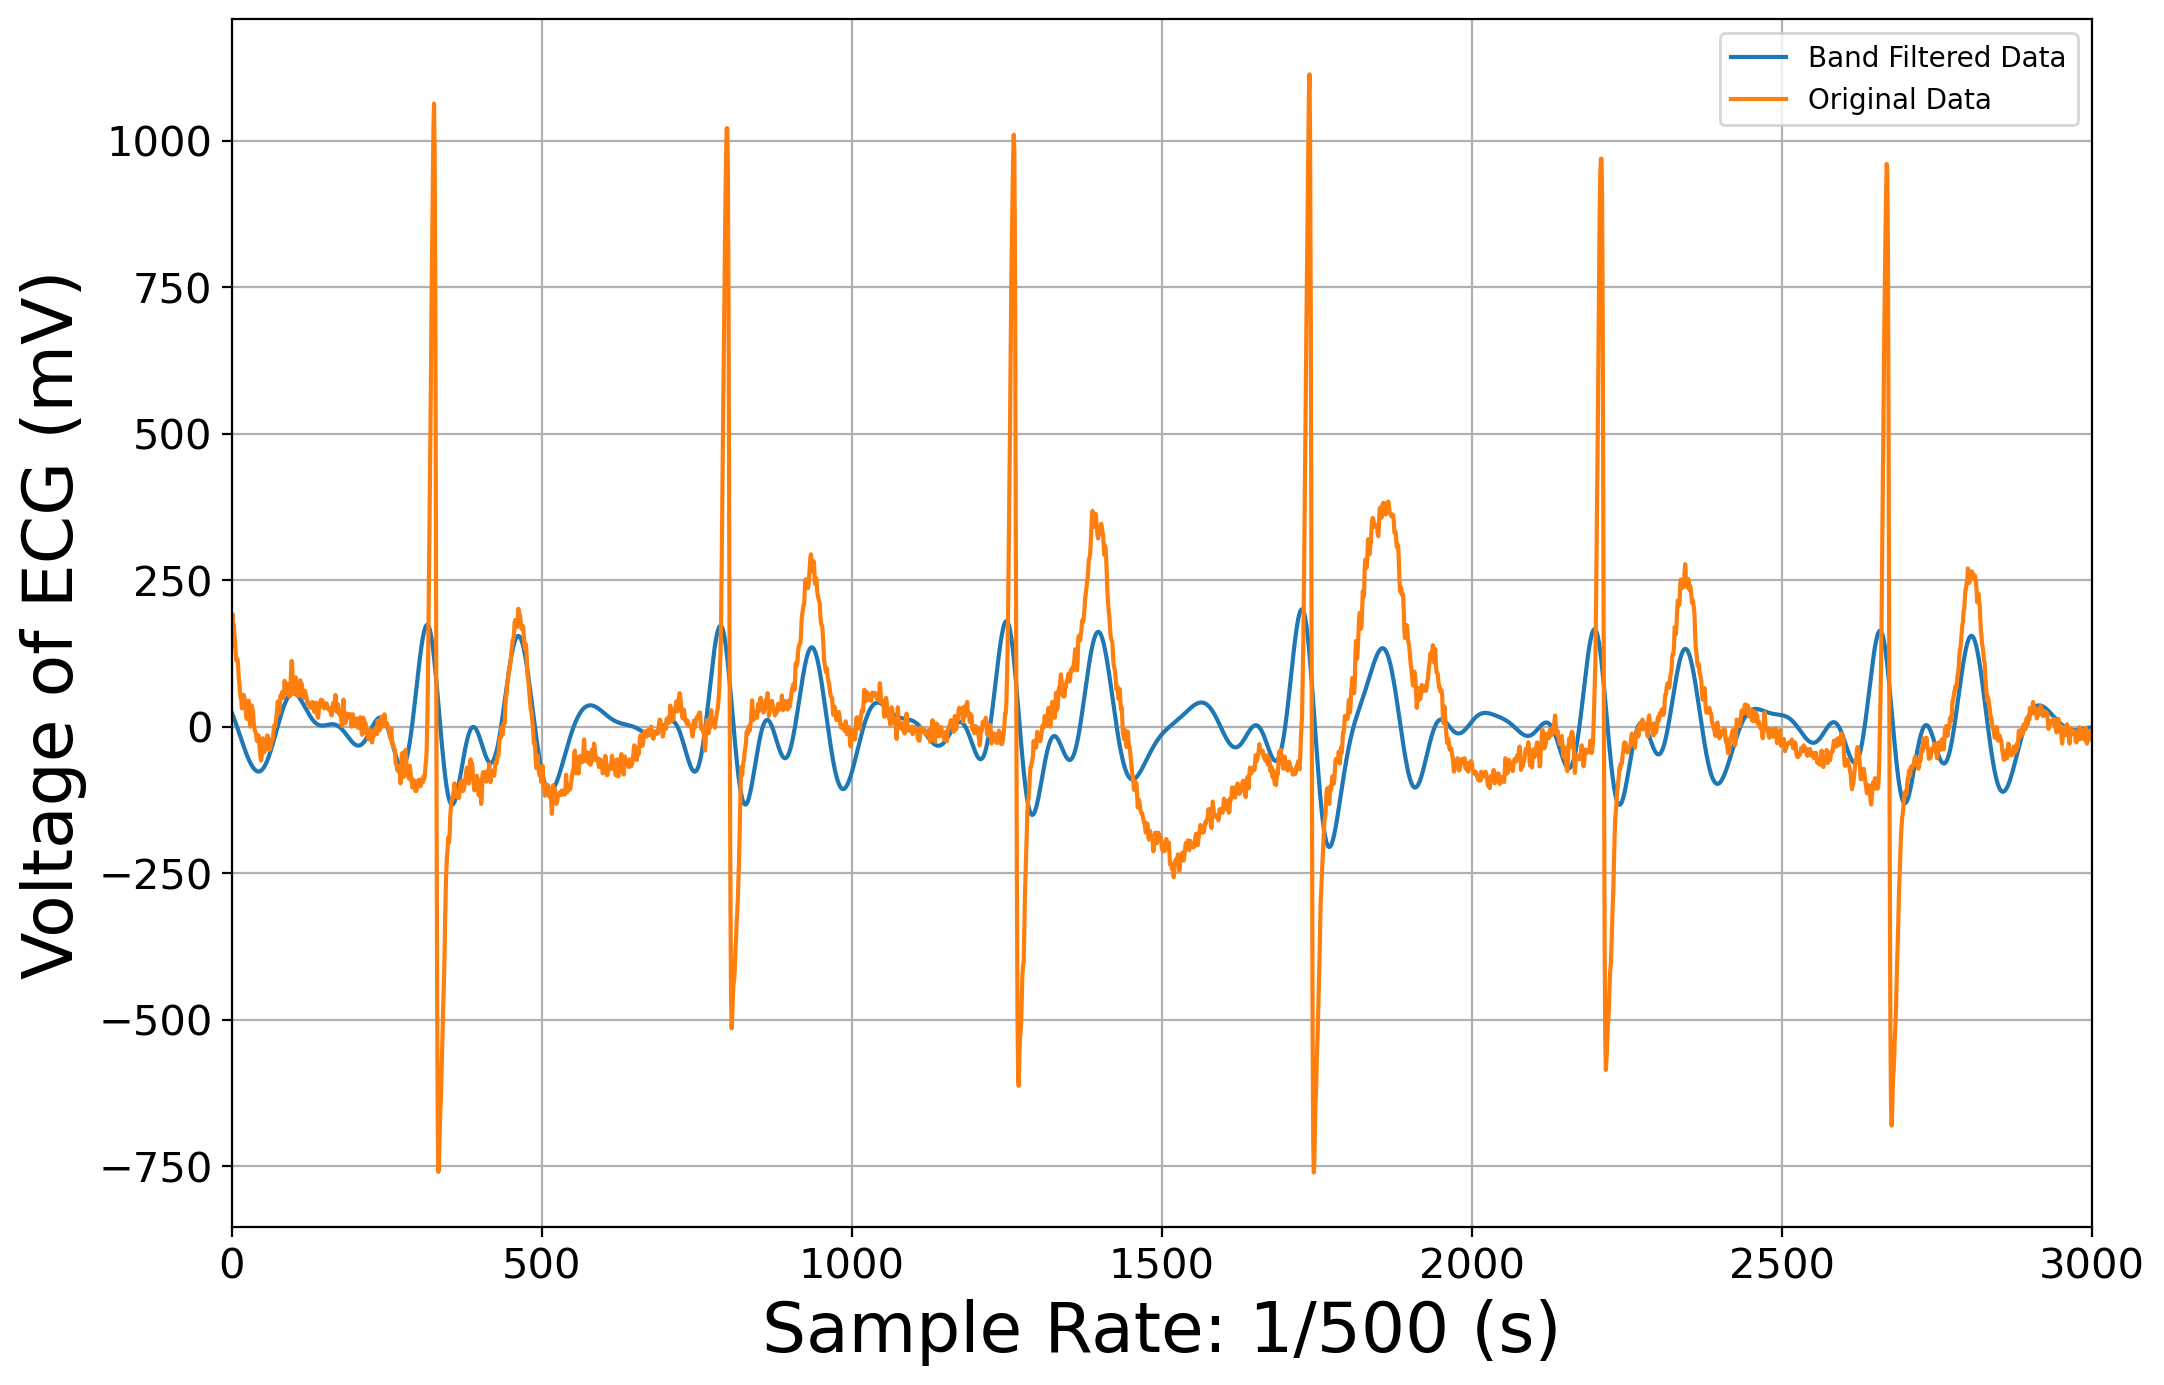

In [12]:
b, a = scipy.signal.butter(3, [.01, .03], 'band')
filteredBandPass = scipy.signal.filtfilt(b, a, data)
plt.plot(filteredBandPass, label = 'Band Filtered Data')
plt.plot(data, label = 'Original Data')
plt.xlabel('Sample Rate: 1/500 (s)', fontsize = 25)
plt.ylabel('Voltage of ECG (mV)', fontsize= 25)
plt.xlim([0,3000])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.grid()

# The above shows an attempted butterworth band filter between 5 and 15 Hz (0.01 and 0.03 since fs=500). This does not fit how I want.

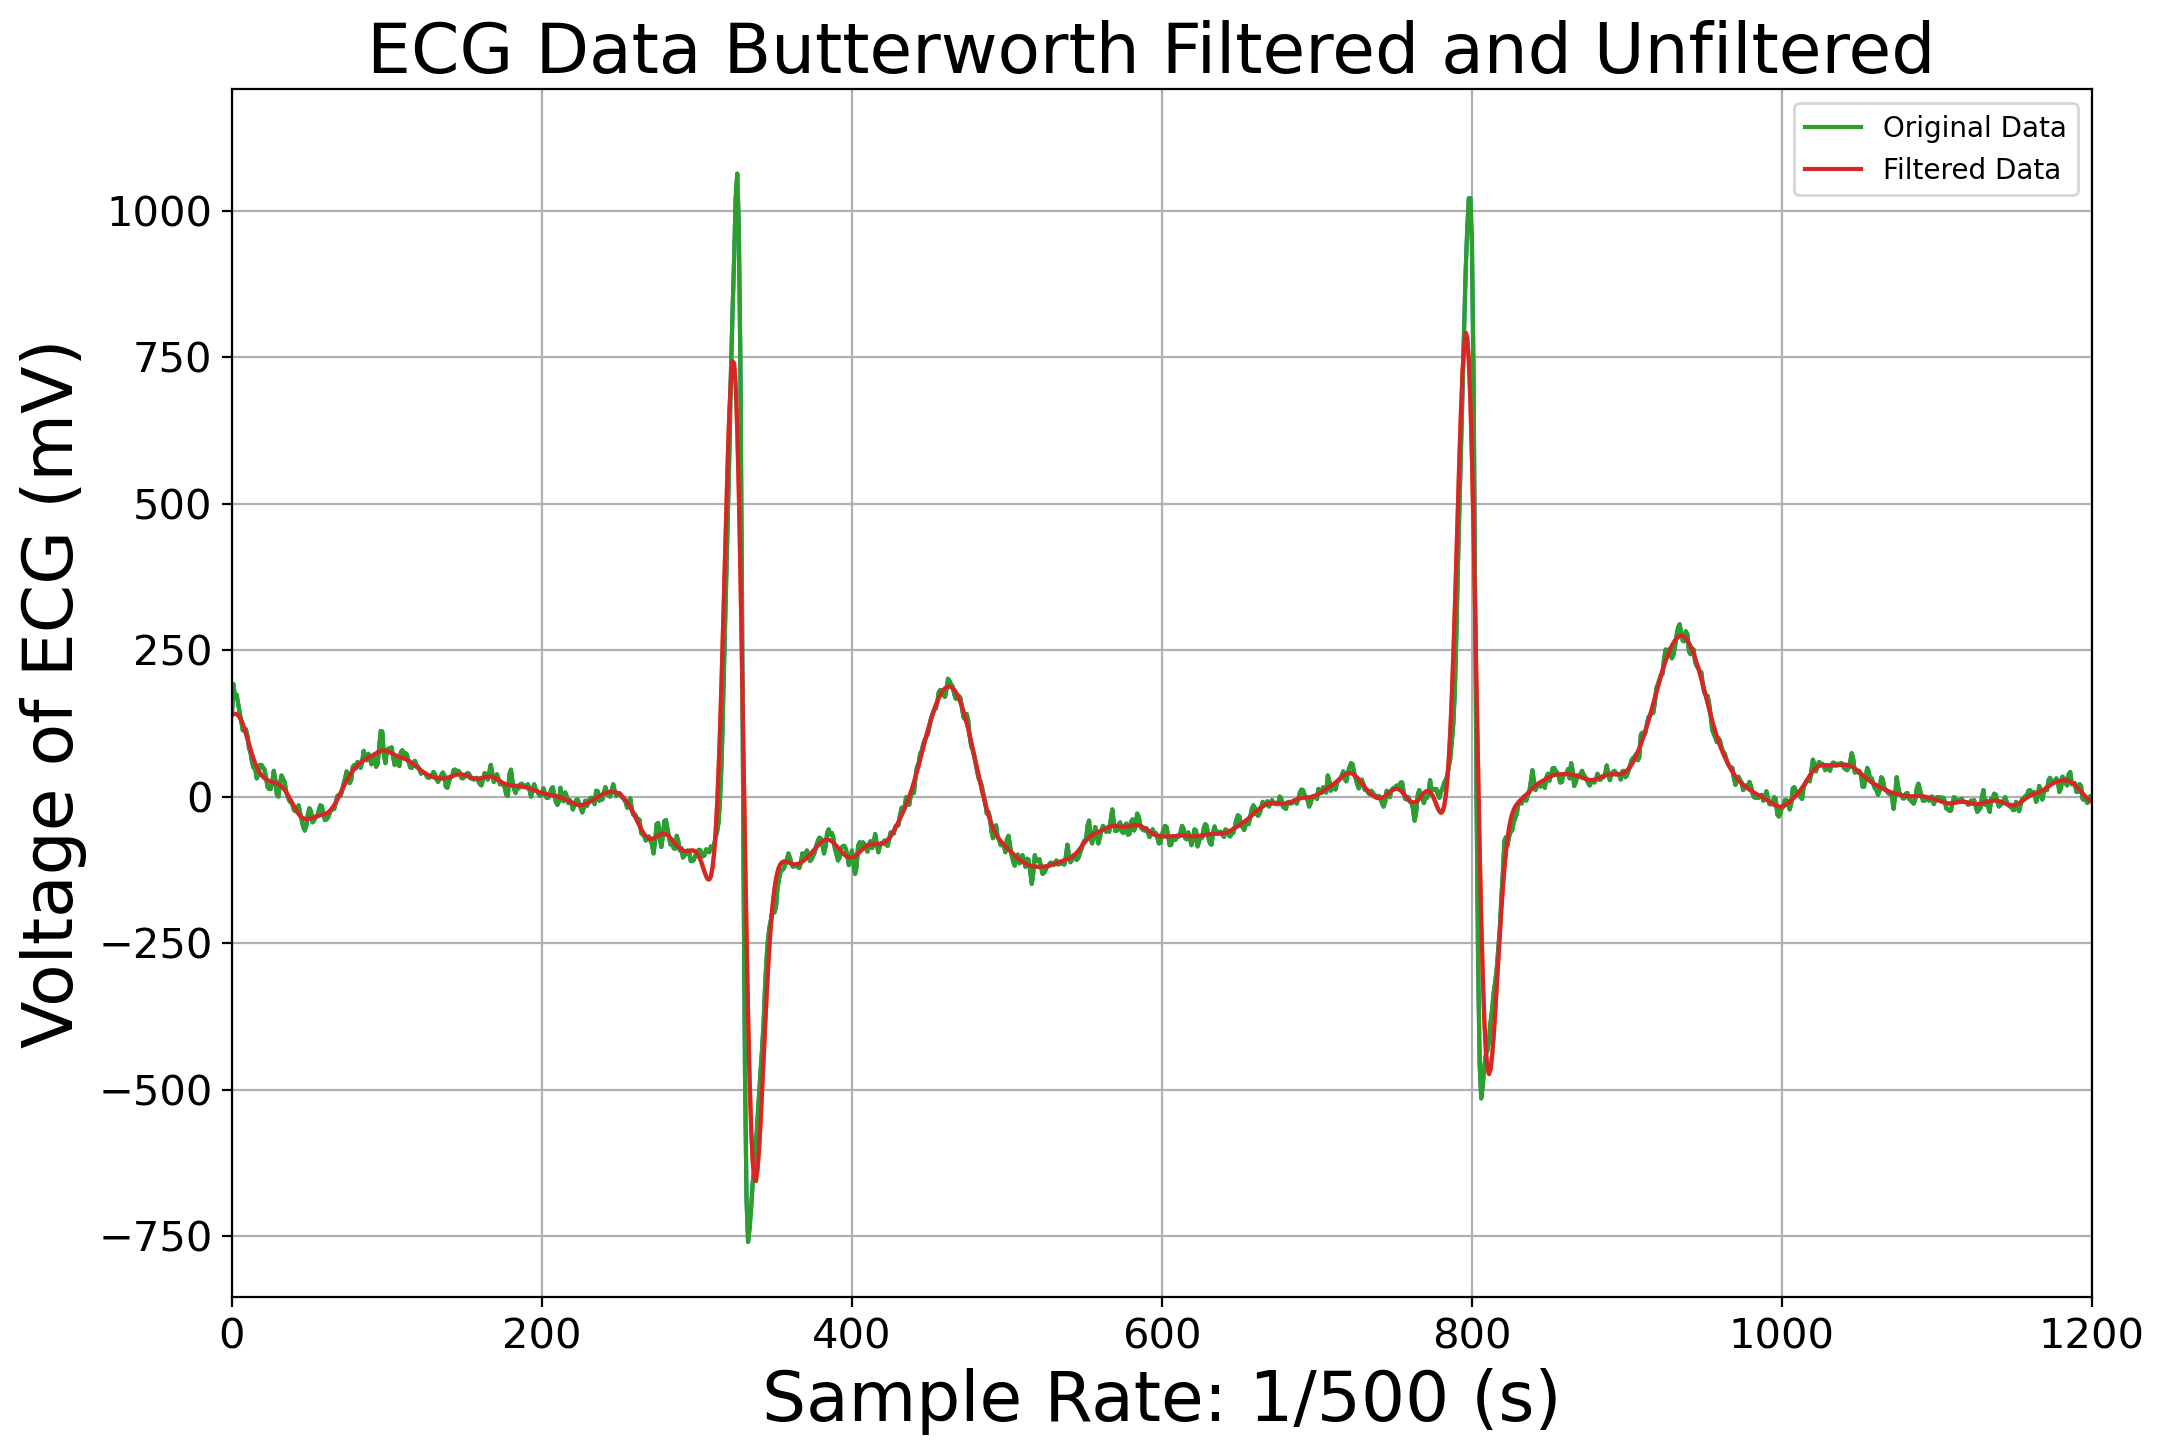

In [18]:

from scipy.signal import butter, lfilter, lfilter_zi
lowcut=5
highcut=15
fs=500
def butter_bandpass_filter_zi(data, lowcut, highcut, fs, order=3):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    zi = lfilter_zi(b, a)
    y,zo = lfilter(b, a, data, zi=zi*data[0])
    return y
y=y
plt.plot(data)
plt.plot(y)

# The above filters the data once in the fowards direction then again in the opposite direction, just as the "filtfilt" command does
plt.plot(data, label = 'Original Data')
plt.plot(y, label = 'Filtered Data')
plt.title("ECG Data Butterworth Filtered and Unfiltered ", fontsize = 25)
plt.xlabel('Sample Rate: 1/500 (s)', fontsize = 25)
plt.ylabel('Voltage of ECG (mV)', fontsize= 25)
plt.xlim([0,1200])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend() 
plt.grid()

# This butterworth bandpass filter has the filtered band between 5 and 15 Hz using a sample frequency of 500Hz. The order of the filter is 3.

# Below is the effects of differnt cutoff frequencies, not a band filter, but a look at the effect of low pass filters just to see how the signal is processed in differnt cutoff values.

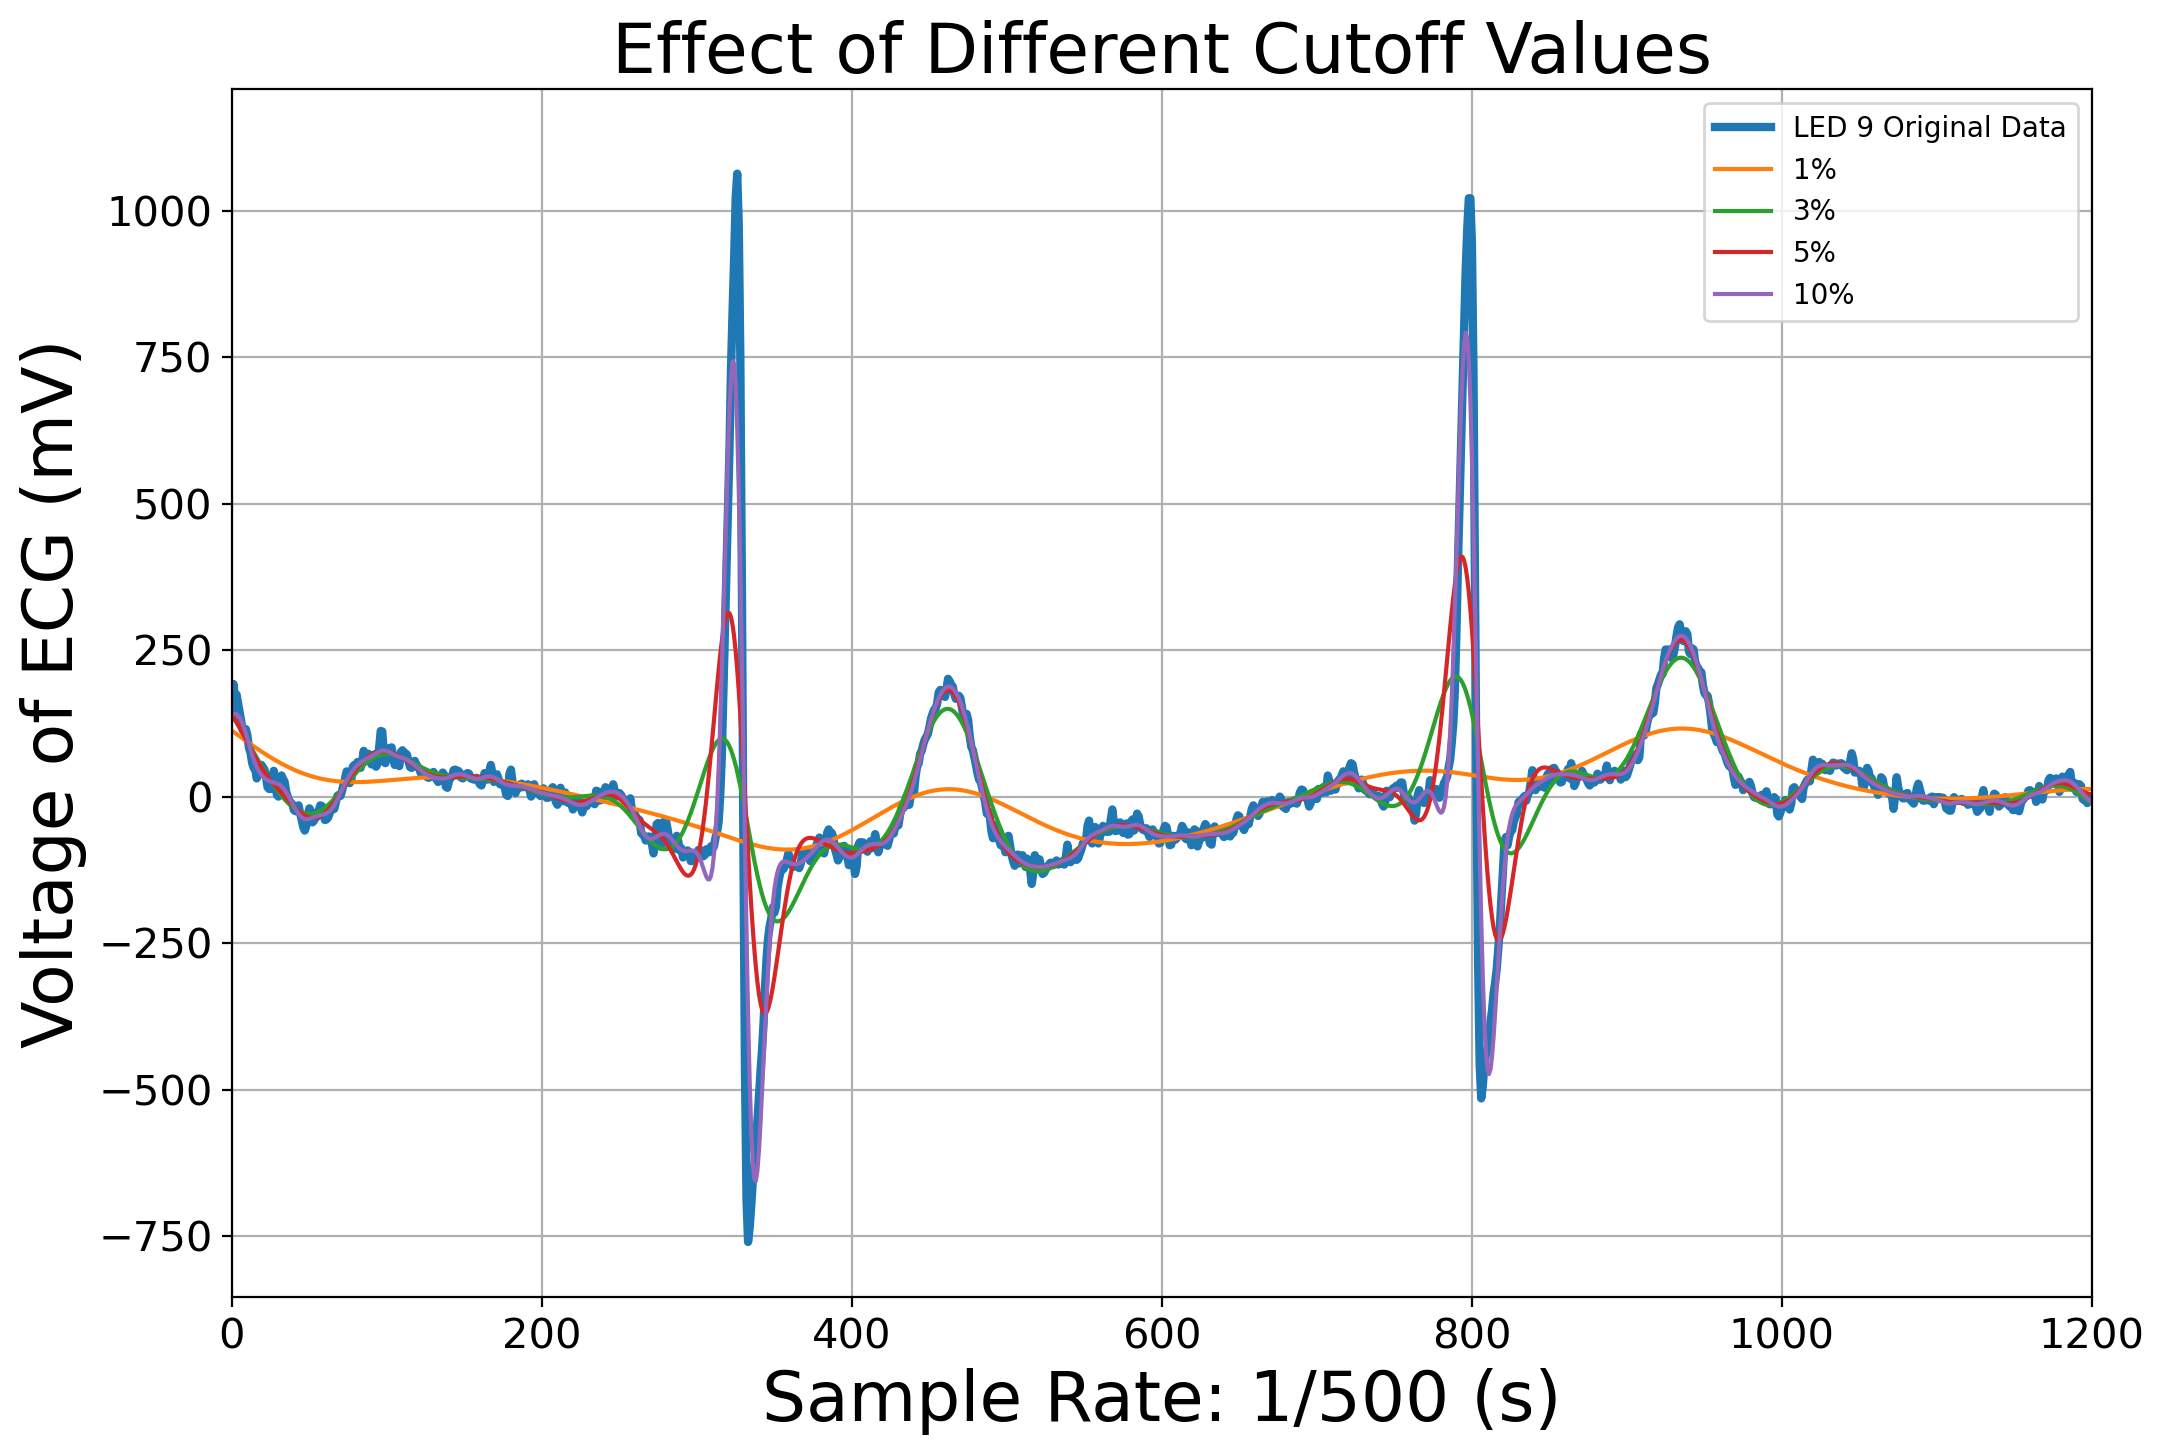

In [15]:
import scipy.signal
data = val[ECG_lead][0:3000]
plt.plot(data, linewidth=3, label="LED 9 Original Data")

for cutoff in [0.01,.03, .05, .1]:
    b, a = scipy.signal.butter(3, cutoff)
    filtered = scipy.signal.filtfilt(b, a, data)
    label = f"{int(cutoff*100):d}%"
    plt.plot(filtered, label=label)

plt.legend()
plt.rcParams['figure.figsize'] = [14, 10]
plt.axis([0, 1200, None, None])
plt.title("Effect of Different Cutoff Values", fontsize = 25)
plt.grid()
plt.xlabel('Sample Rate: 1/500 (s)', fontsize = 25)
plt.ylabel('Voltage of ECG (mV)', fontsize= 25)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

# The above shows differnt cutoff frequency values using a low pass butterworth filter from 1% (5Hz) to 10% (50Hz) to see the effect that different cutoff frequecies can have to the data.

# Below is the attempt at the frequency response for the data, however, I need to investigate more.

C:\Users\benja\AppData\Local\Temp/ipykernel_37432/2741821037.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(w, 20 * np.log10(abs(h)))


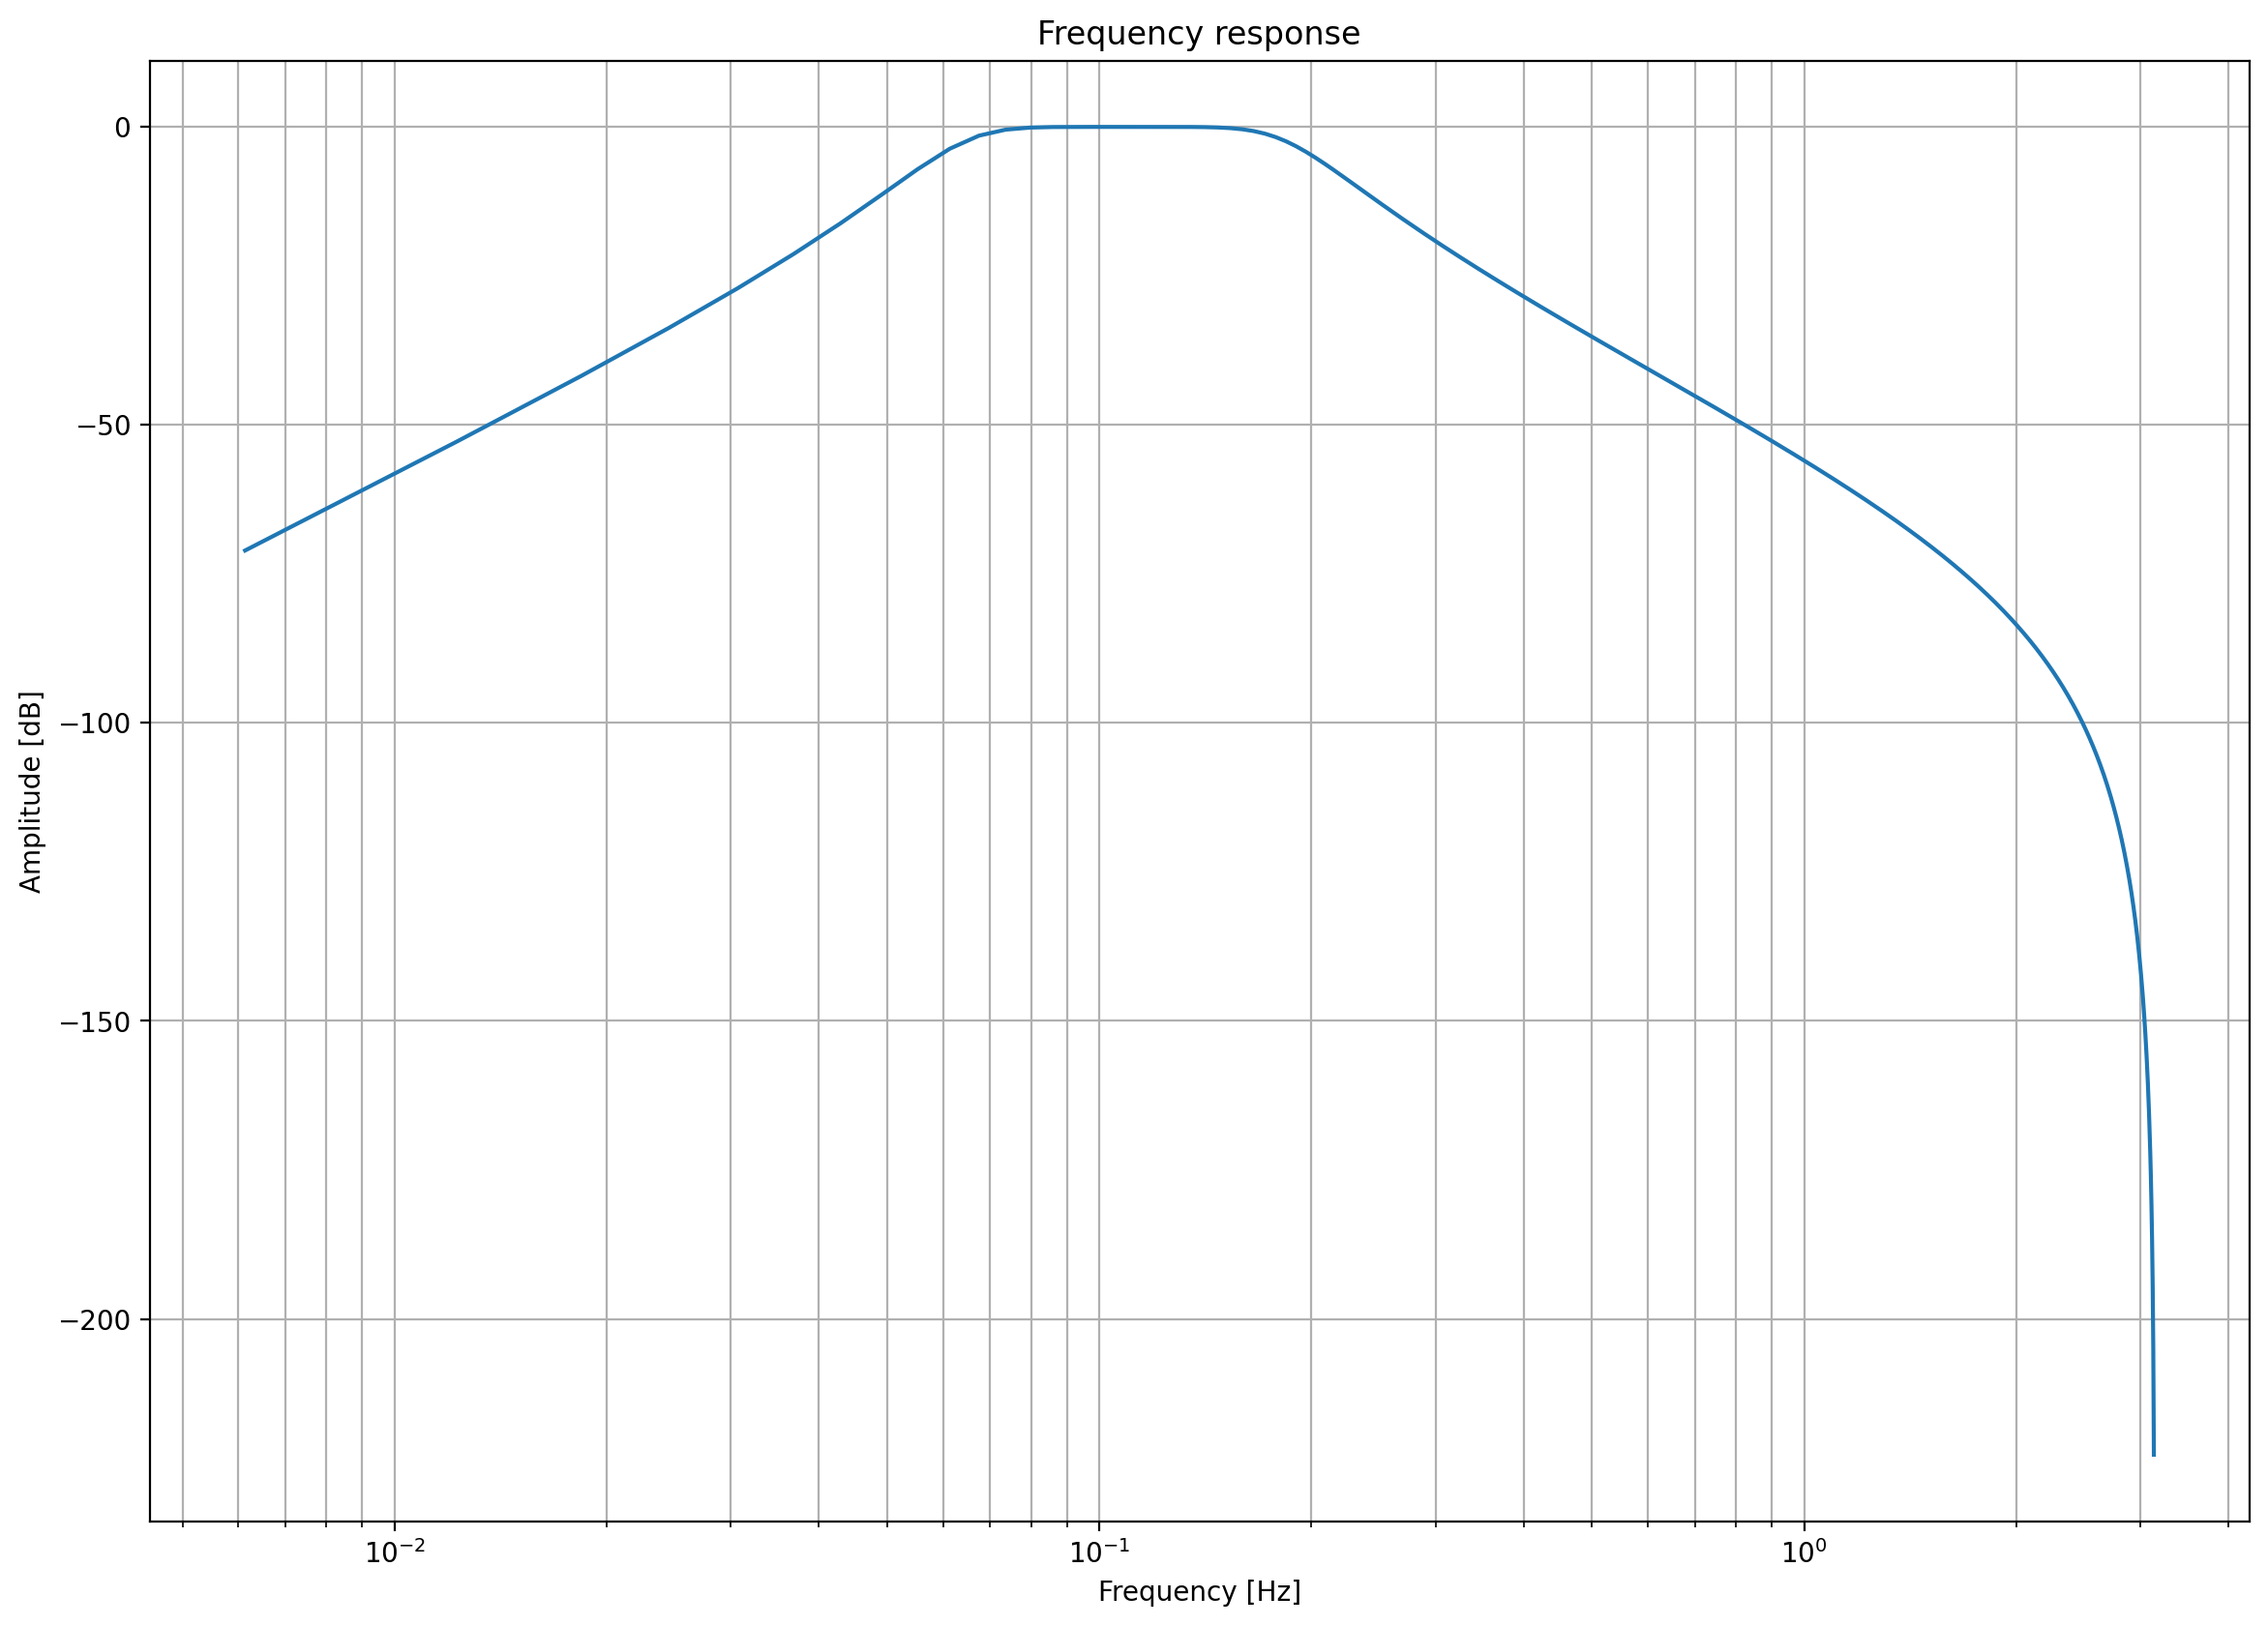

In [16]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

b_l, a_l = signal.butter(3, [5,15], 'bandpass', fs=500)
w, h = signal.freqz(b_l, a_l)
#x = w * fs * 1.0 / (2 * np.pi)
#y = 20 * np.log10(abs(h))
plt.semilogx(w, 20 * np.log10(abs(h)))
#plt.figure(figsize=(10,5))
#plt.semilogx(x, y)
plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency [Hz]')
plt.title('Frequency response')
plt.grid(which='both', axis='both')
plt.show()

# Step 3: Feature Extraction: Windowing, Power

# Before starting step 3 I changed two things from the previous step. The first was fixing the frequency response plots above. I fixed this my correcting the way it was graphing in the window as well as fixing the frequency response itself by using the command signal.freqz instead of signal.freqs since this is a digital filter. The other thing I added was an additional way to filter the data in step 2. I introduced the filtfilt command in my code and used that as a different but still correct way to filter my signal in less code. This is shown below.

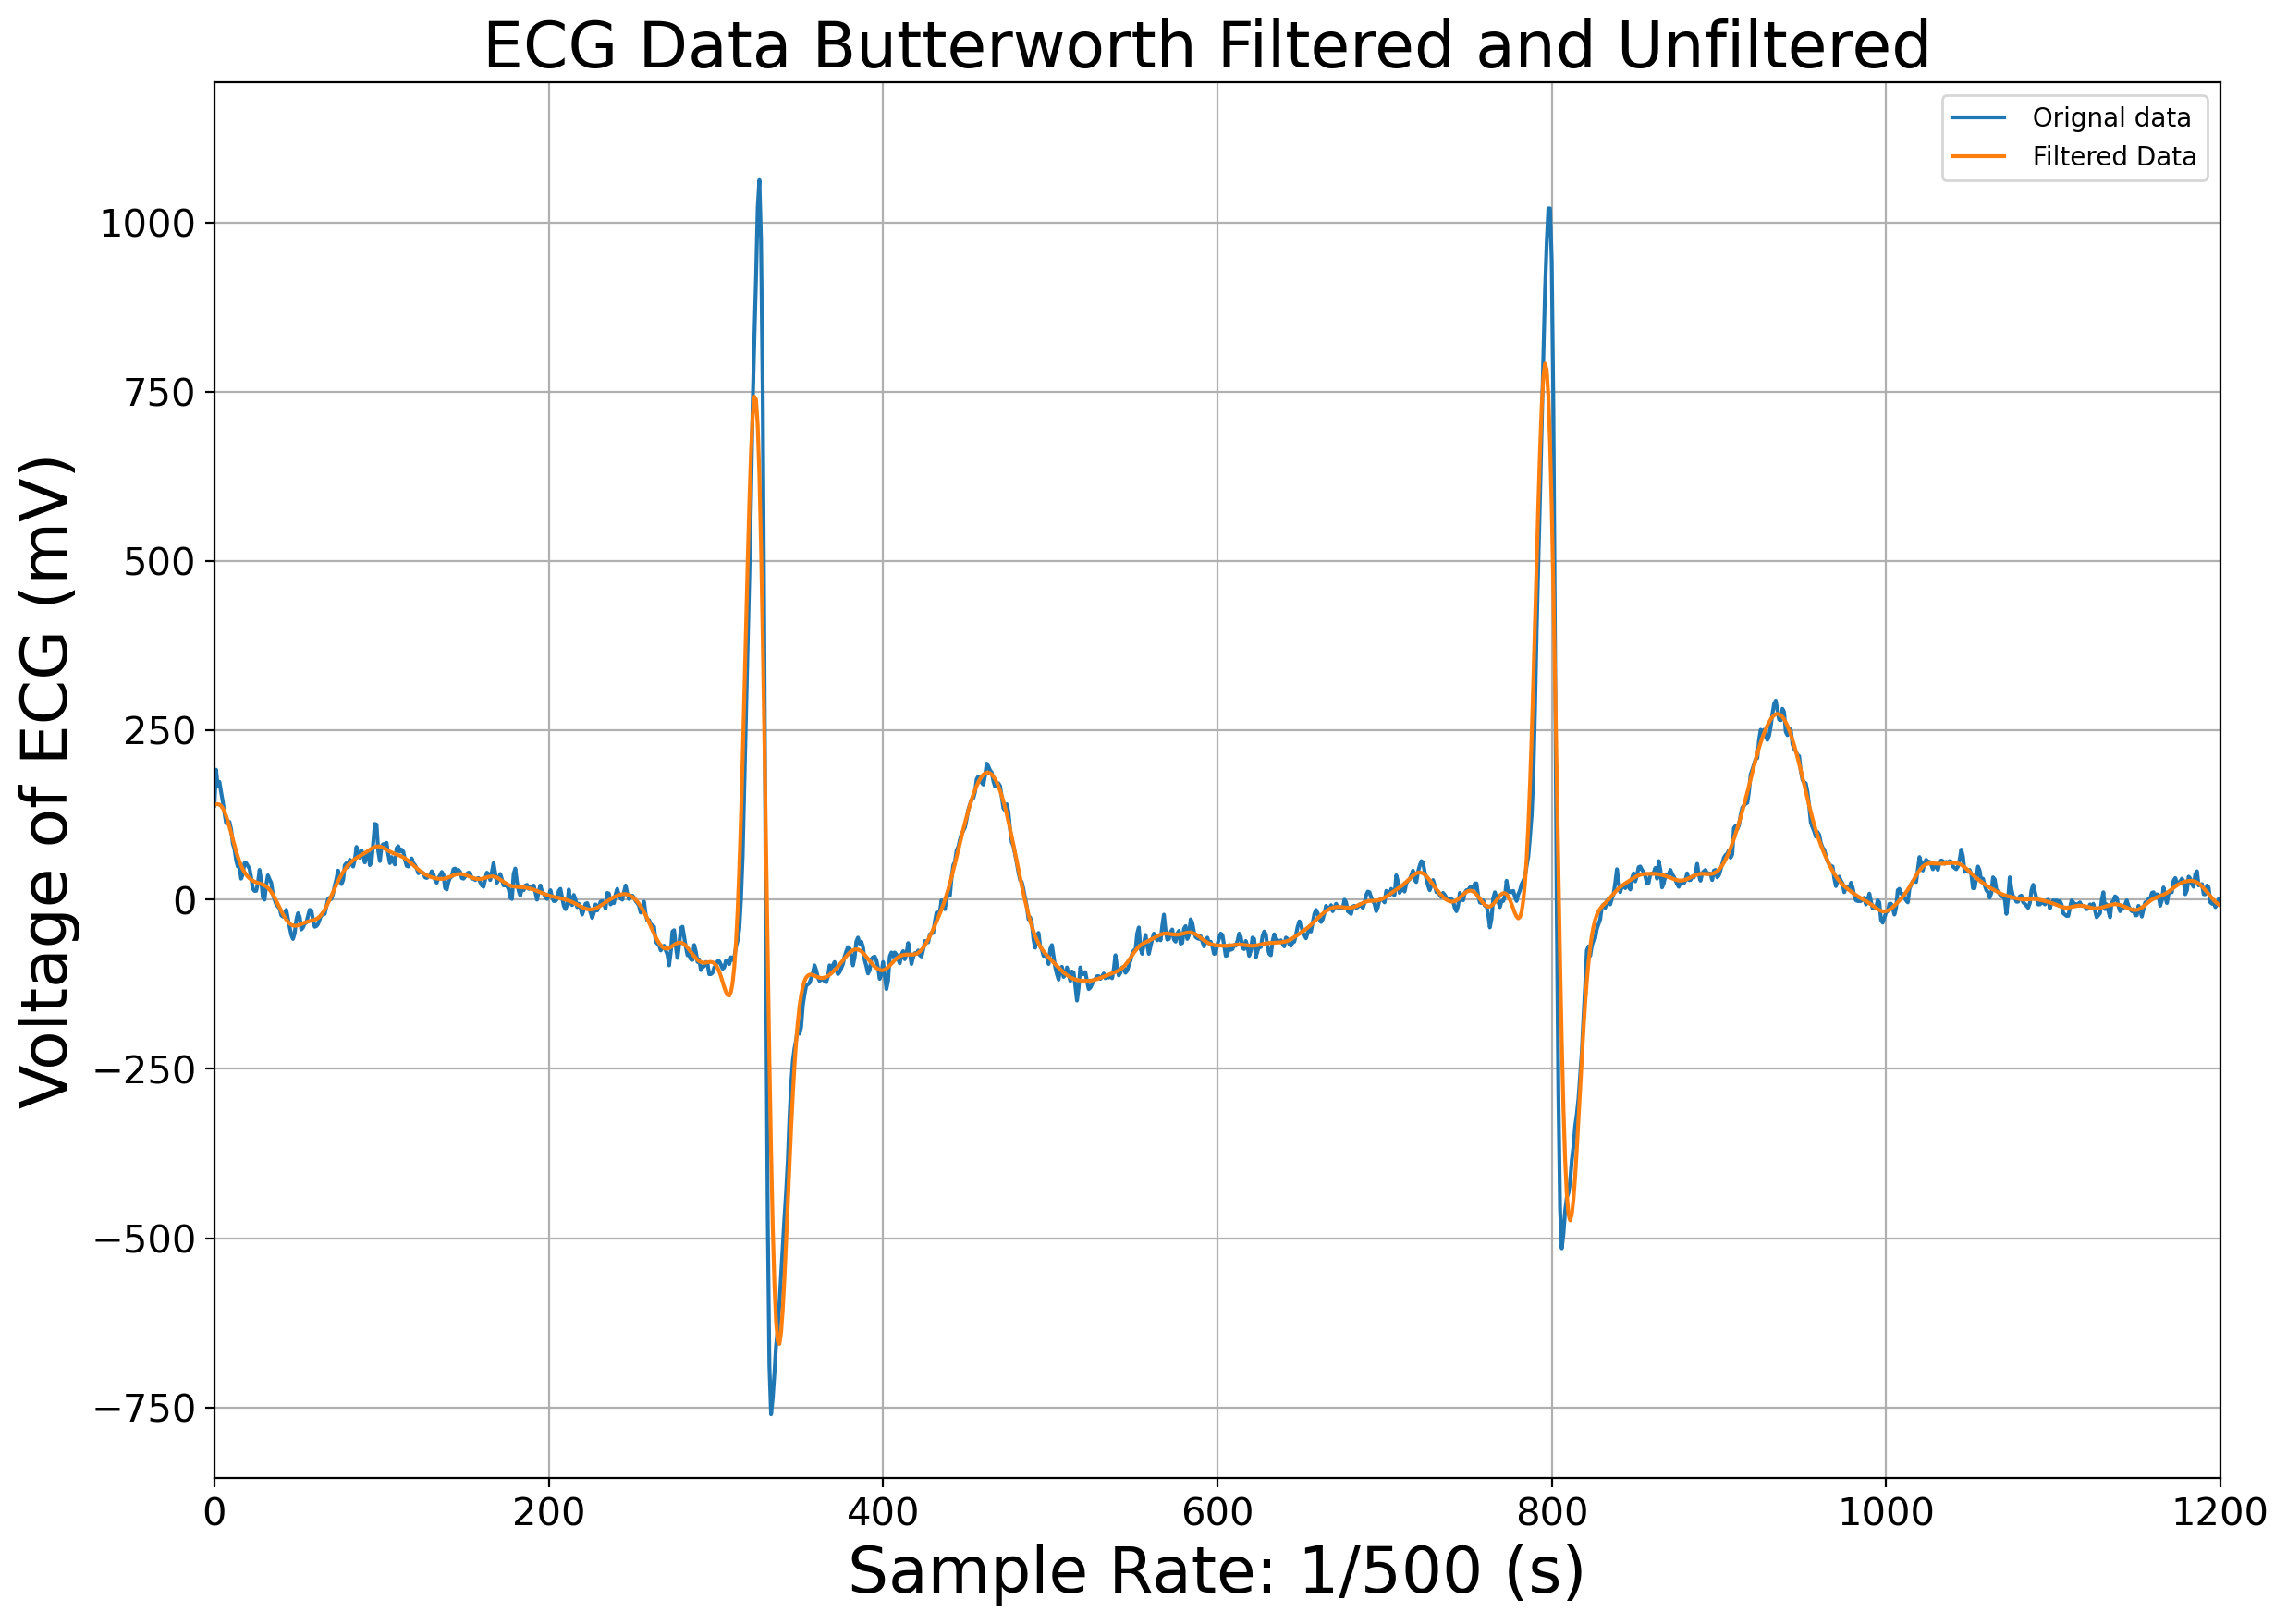

In [17]:
from scipy.signal import lfilter, lfilter_zi, filtfilt, butter

b, a = butter(3, 0.10) # b=order of filter, a = normalized cutoff frequency 


# Use filtfilt to apply the filter. -- this filter filters the signal twice in opposite direction to cancel out the phase shift that occurs so data lines up
y = filtfilt(b, a, val[ECG_lead][0:3000])

plt.plot(val[ECG_lead][0:3000], label = ' Orignal data')
plt.plot(y, label = ' Filtered Data')
plt.rcParams['figure.figsize'] = [12, 8]
plt.title("ECG Data Butterworth Filtered and Unfiltered ", fontsize = 25)
plt.xlabel('Sample Rate: 1/500 (s)', fontsize = 25)
plt.ylabel('Voltage of ECG (mV)', fontsize= 25)
plt.xlim([0,1200])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend() 
plt.grid()

# Below is the actual start to Step 3 of the project.

The code below calls the varible function "y" and the creates a new variable "q" using the exponent funtion pow(). This function raises the values of y, the filtered data, to the power of 2 point by point. This creates a funtion that when plotted shows all the data for the ECG filtered to the power of 2, and is thus all positive values. I also divided the data of the voltages by 1000 to make the milivolts to volts just for easier viewing on the graph.

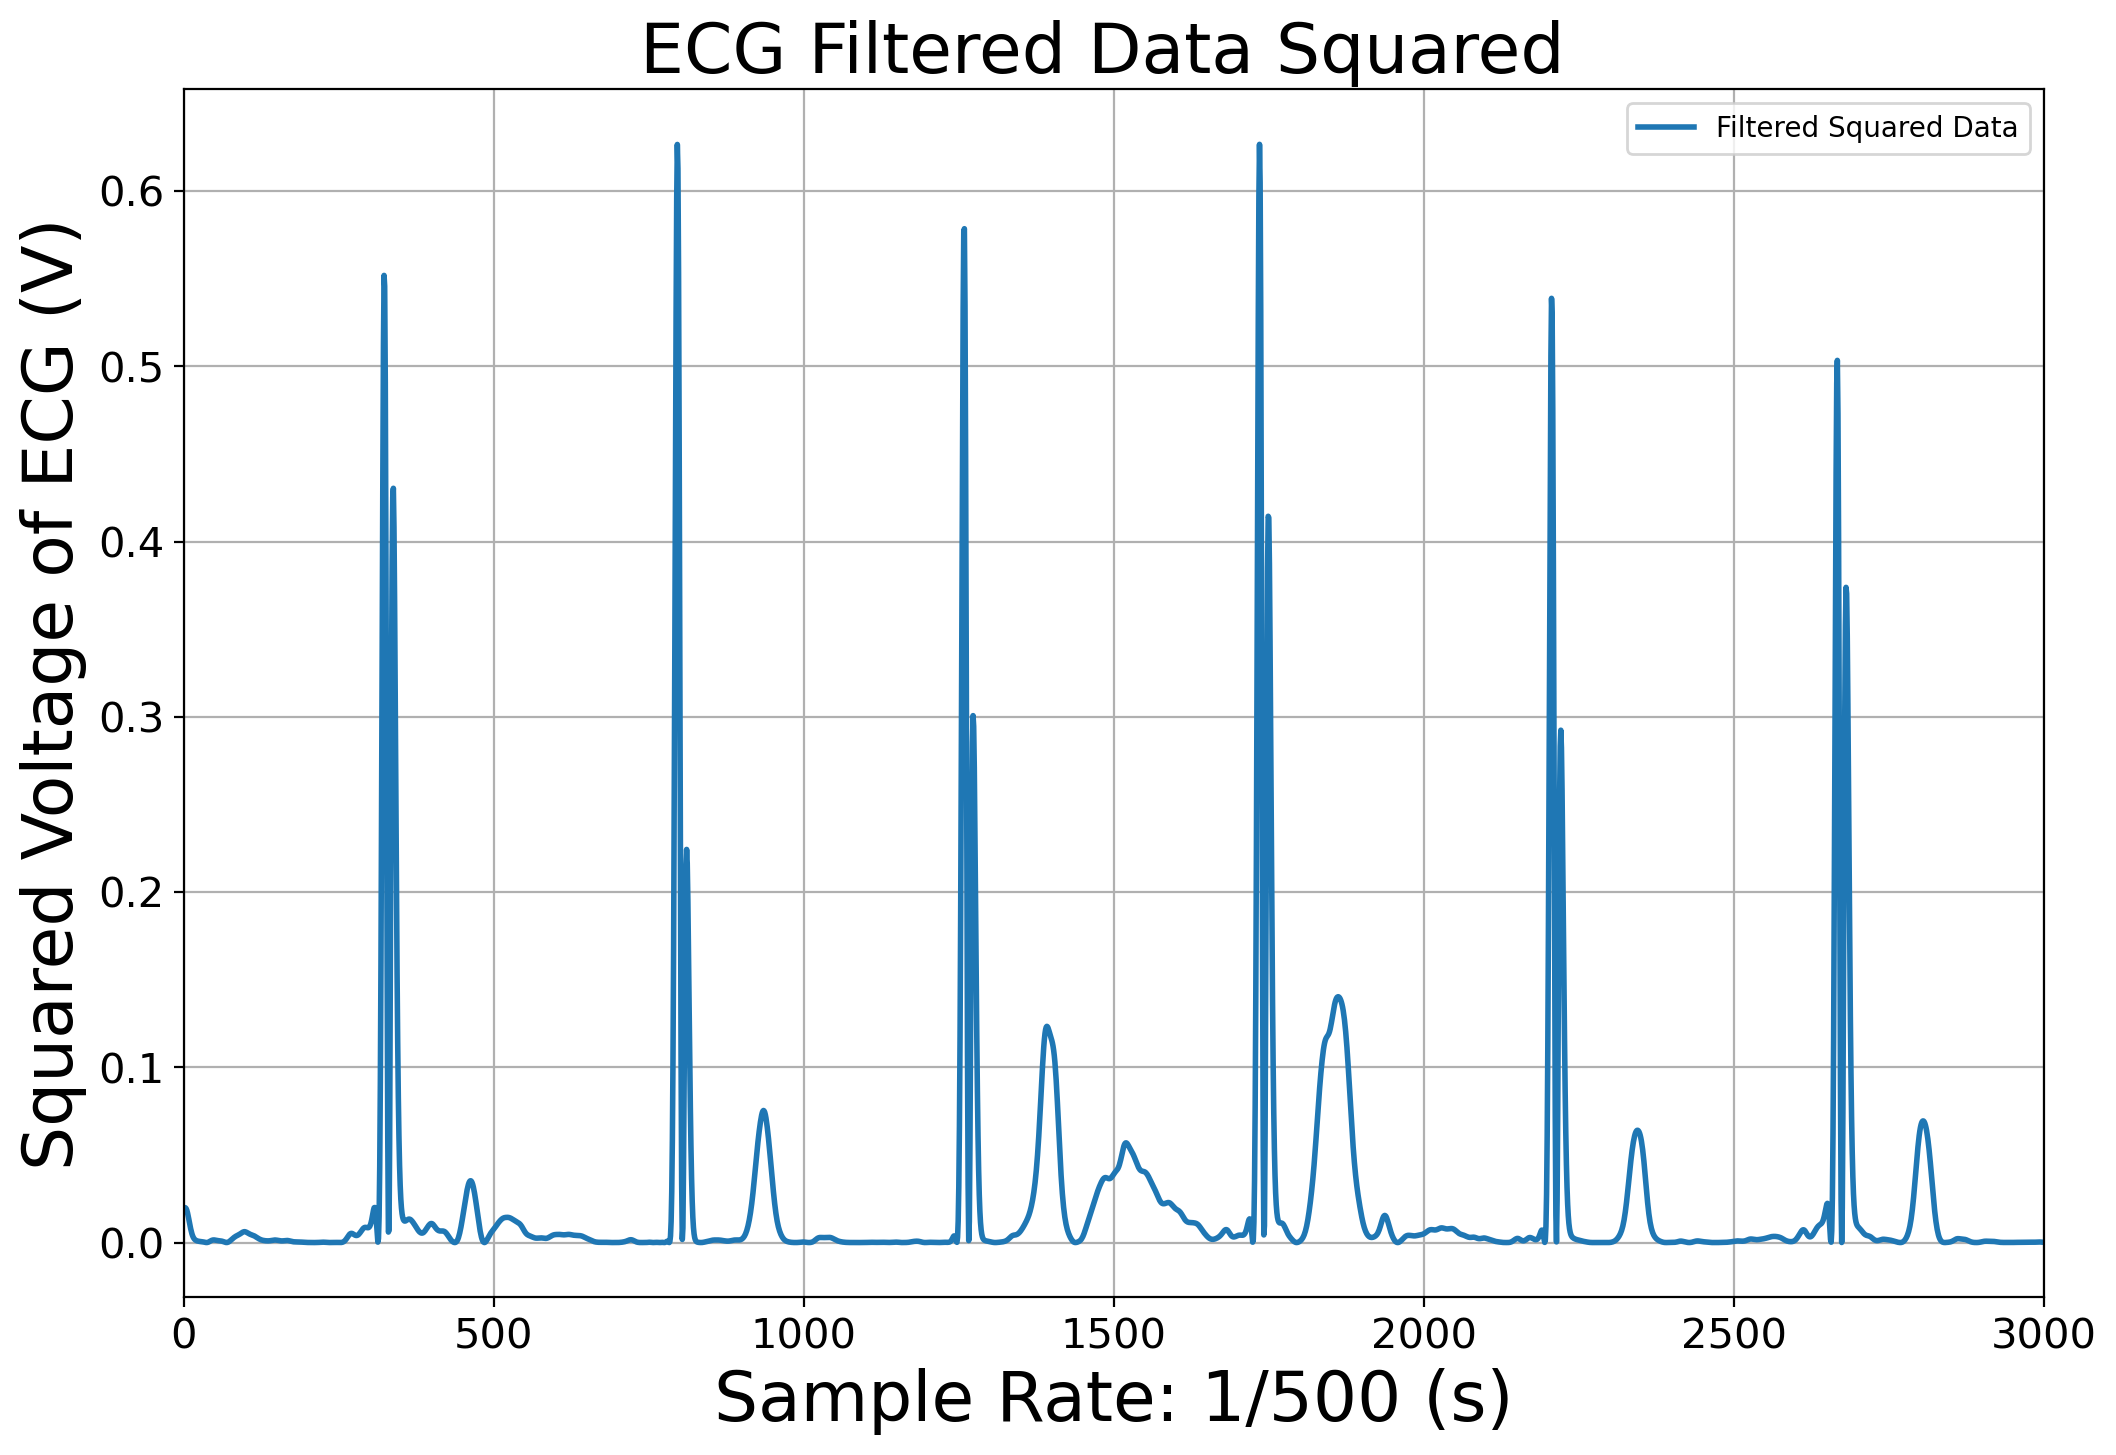

In [19]:
from scipy.signal import lfilter, lfilter_zi, filtfilt, butter

b, a = butter(3, 0.10) # b=order of filter, a = normalized cutoff frequency 
data = val[ECG_lead][0:3000]/1000 #divided by 100 to produce better looking y-axis

# Use filtfilt to apply the filter. -- this filter filters the signal twice in opposite direction to cancel out the phase shift that occurs so data lines up
y = filtfilt(b, a, data)


q = pow(y,2)
plt.plot(q, linewidth = 2, label = 'Filtered Squared Data')
plt.title("ECG Filtered Data Squared ", fontsize = 25)
plt.xlabel('Sample Rate: 1/500 (s)', fontsize = 25)
plt.ylabel('Squared Voltage of ECG (V)', fontsize= 25)
plt.xlim([0,3000])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend() 
plt.grid()

# The above plot shows how the T waves that come after the QRS complexes vary in size as well as a larger spike around the 1500th sample after the T wave there seems to be some noise.

# Below is a zoomed in picture of the filtered squared ECG data

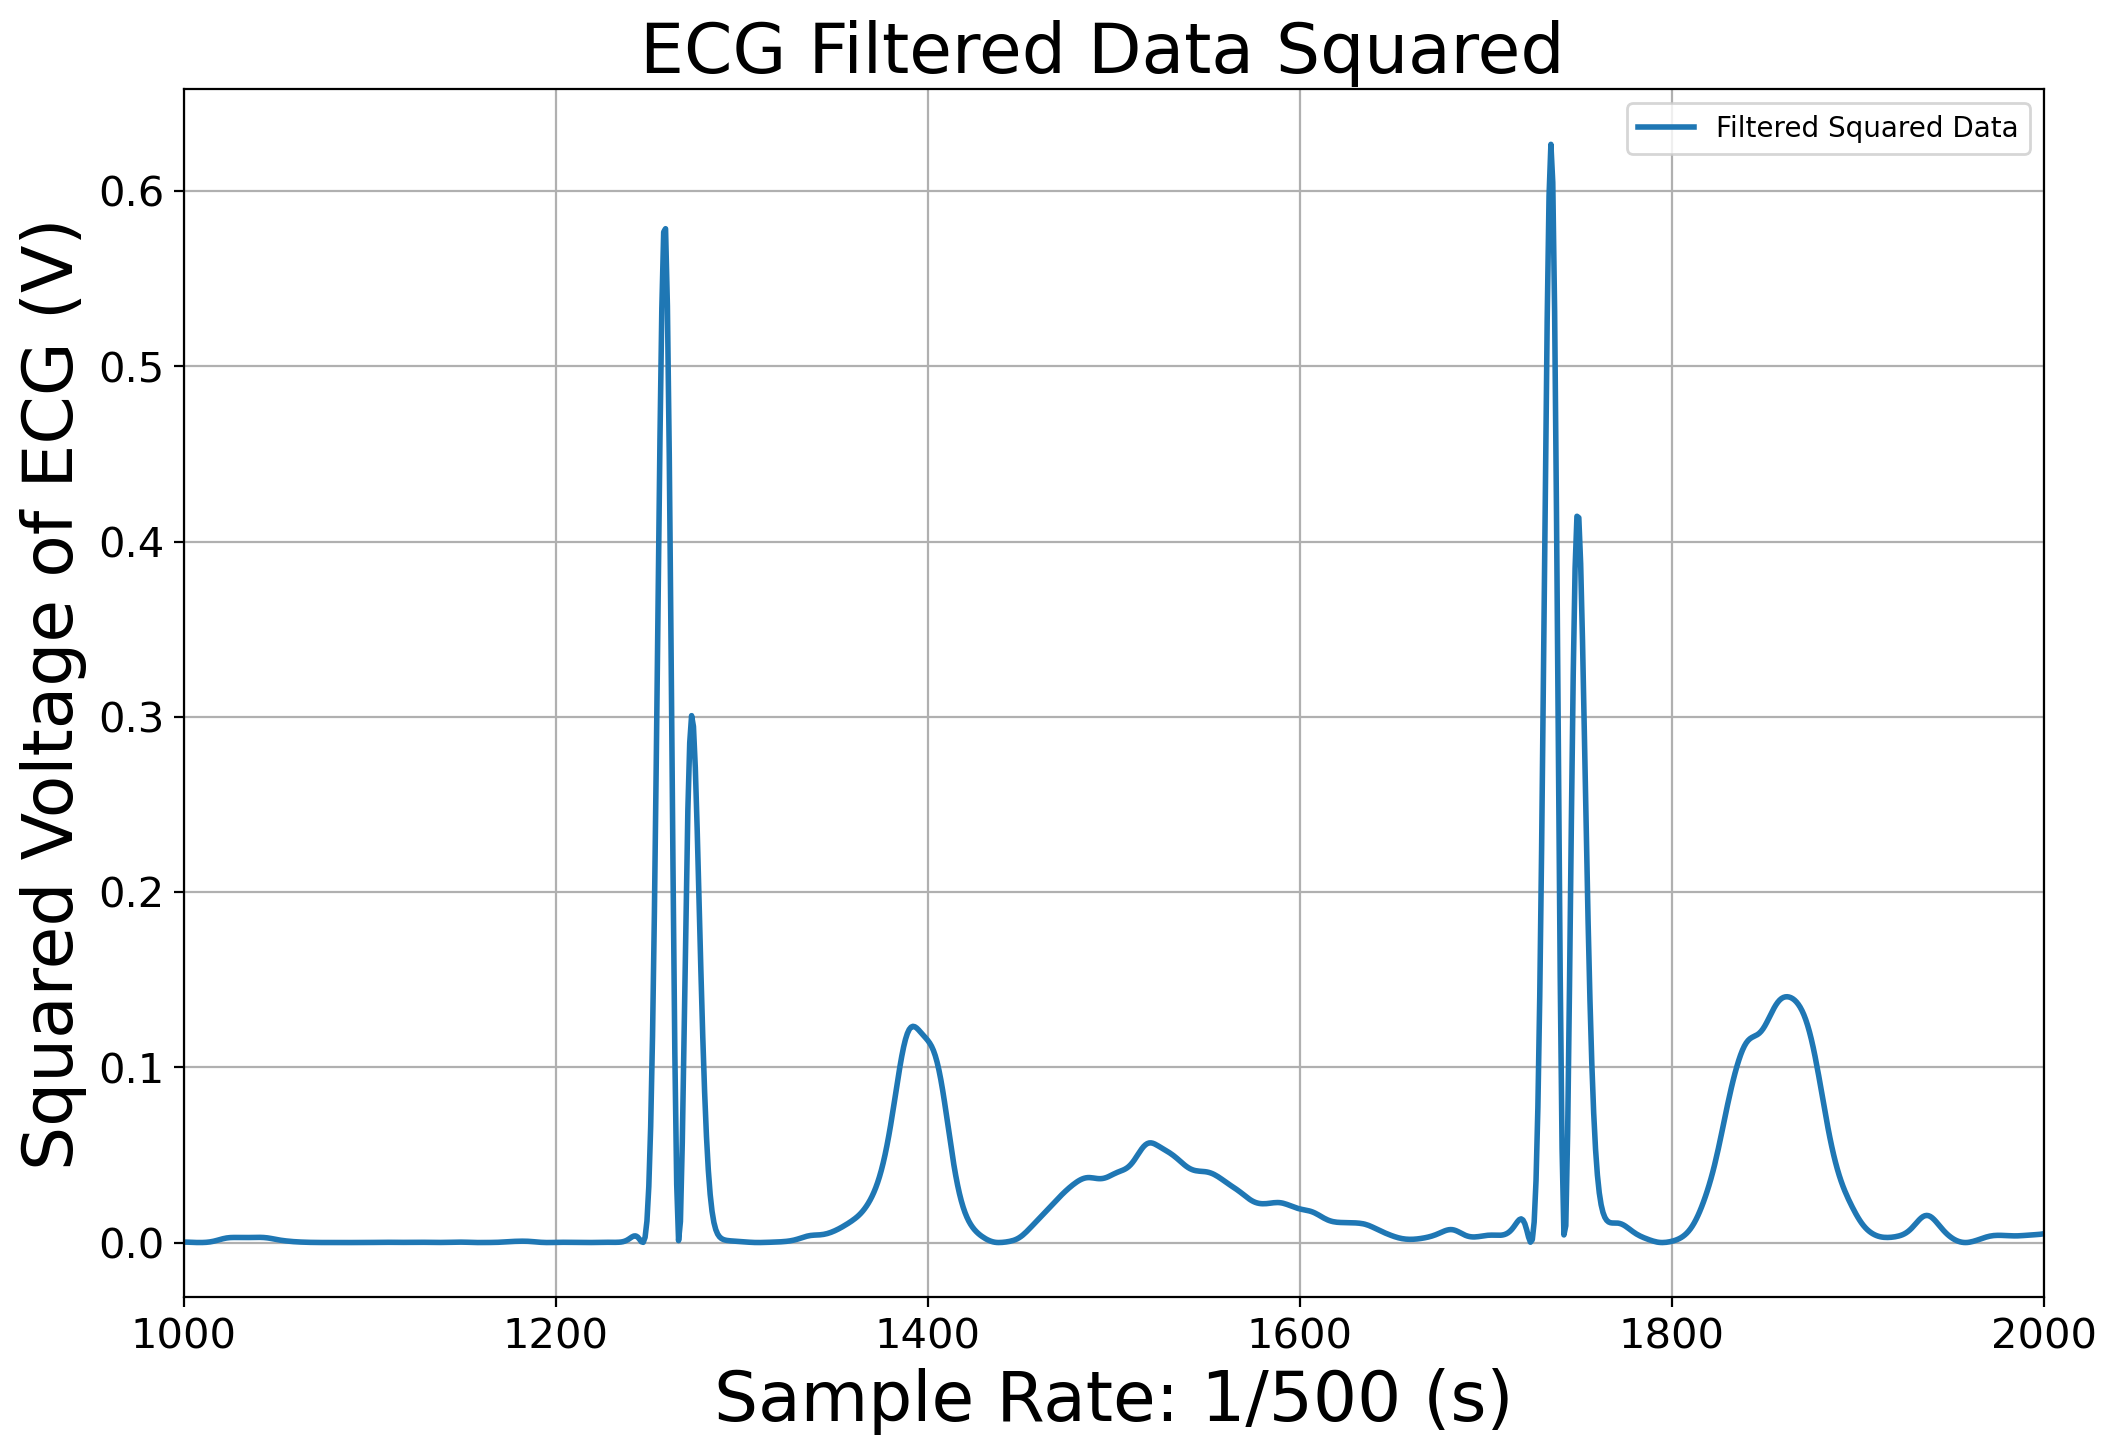

In [20]:
plt.plot(q, linewidth = 2, label = 'Filtered Squared Data')
plt.title("ECG Filtered Data Squared ", fontsize = 25)
plt.xlabel('Sample Rate: 1/500 (s)', fontsize = 25)
plt.ylabel('Squared Voltage of ECG (V)', fontsize= 25)
plt.xlim([1000,2000])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend() 
plt.grid()

After raising all the data points to the power of 2, I then did the poewr of 4 (not 3 since that would create negative values) to further expand the differneces between the QRS complexes and the T waves from the origianl ECG signal.

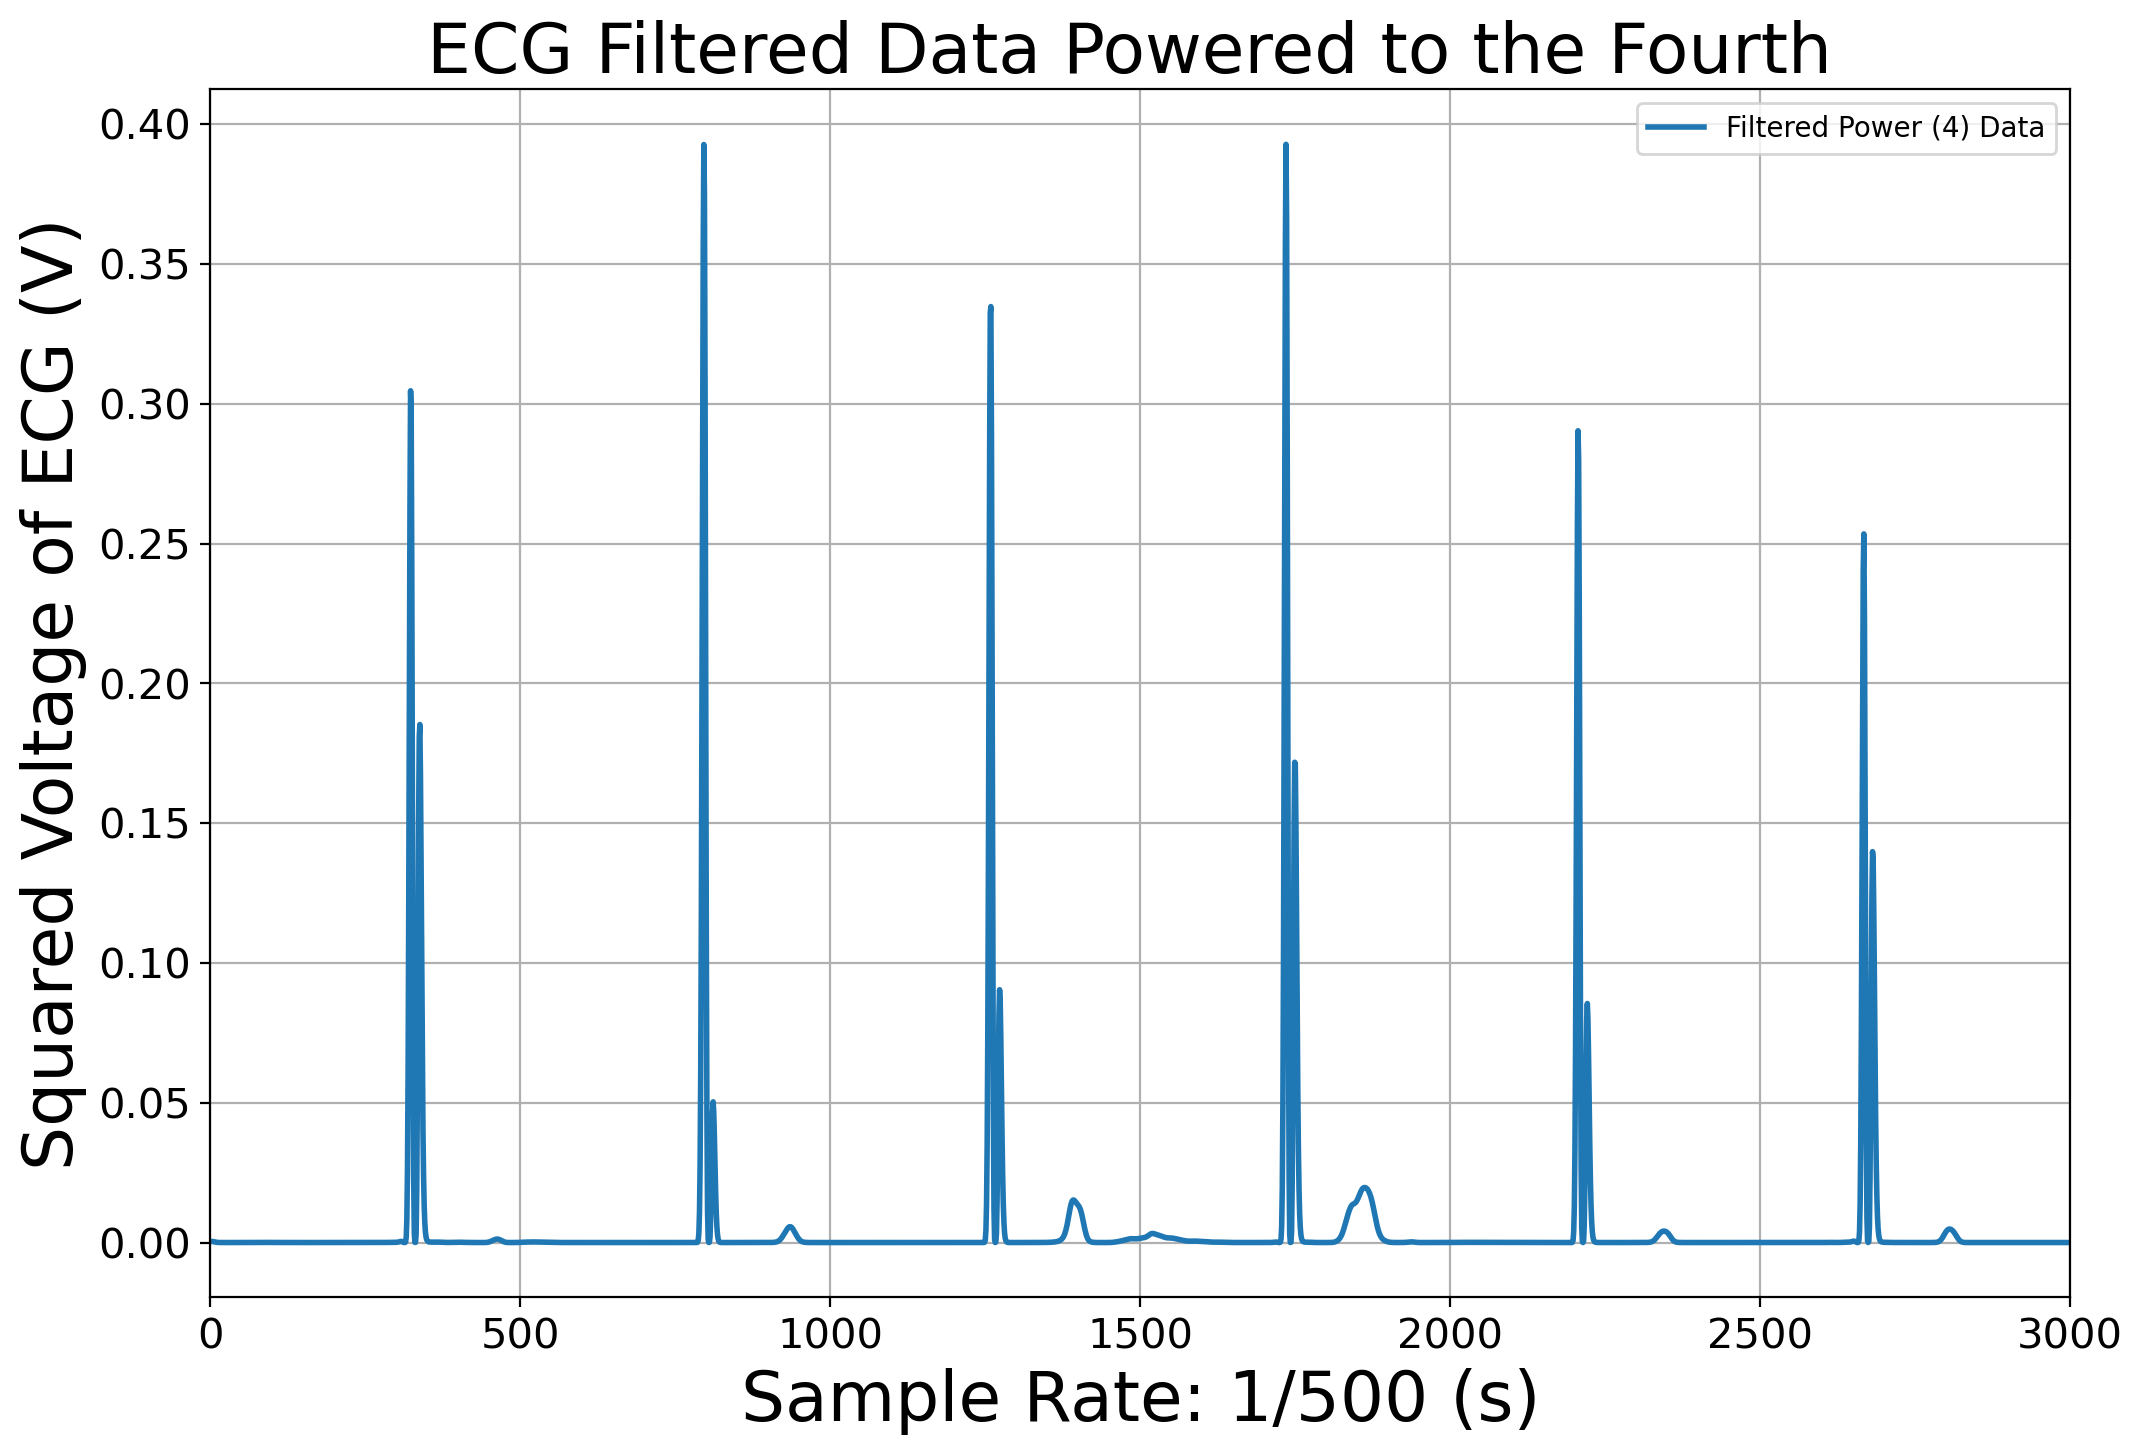

In [21]:
r = pow(y,4)
plt.plot(r, linewidth = 2, label = 'Filtered Power (4) Data')
plt.title("ECG Filtered Data Powered to the Fourth ", fontsize = 25)
plt.xlabel('Sample Rate: 1/500 (s)', fontsize = 25)
plt.ylabel('Squared Voltage of ECG (V)', fontsize= 25)
plt.xlim([0,3000])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend() 
plt.grid()

ABOVE is power of 4 to further distingish QRS complex from T wave

The next block of code is just some statistical data that I found interesting form the orgianl ECG data. This is done my importing the statisitics module to find the standard deviation of the sampled points, as well as the maximum and minimum voltage values.

In [22]:
import statistics as st
MIN = np.min(data)
print(MIN, "volts") 
MAX = np.max(data)
print(MAX, "volts")
STD = st.stdev(data)
print(STD, "(Standard Dev)")

-0.761 volts
1.113 volts
0.17785387154217602 (Standard Dev)


# Step 4: Classification/ Regression: Threshold for QRS Detection, Peak Detection, and Peak to Peak Heart Rate

# Below is the first step, adding a horizontal line to be a threshold to visualize if a QRS complex is detected. If the signal on the graph of the filtered squared ECG signal crosses the purple line, then that is evidence of a QRS complex present. These is also another red dotted line lower on the graph, that shows the threshold of other ECg complexes below it such as the T-wave, or if P-waves were present in the ECG then they would also be below the red dotted line. The purple line simply gives a better threshold of a definitive QRS complex that if crossed gives certainty of a QRS complex. So, the threshold is set at 0.4 Volts so it is as accurate as possilbe at detecting the QRS complexes visually.

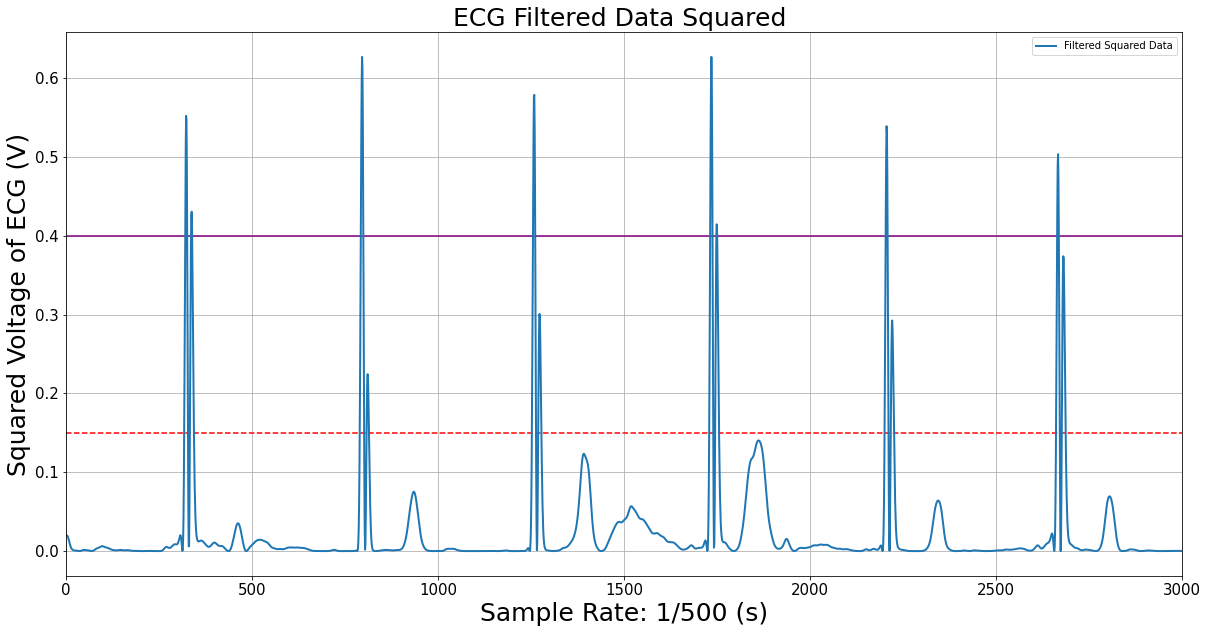

In [79]:
q = pow(y,2)
plt.plot(q, linewidth = 2, label = 'Filtered Squared Data')
plt.title("ECG Filtered Data Squared ", fontsize = 25)
plt.xlabel('Sample Rate: 1/500 (s)', fontsize = 25)
plt.ylabel('Squared Voltage of ECG (V)', fontsize= 25)
plt.xlim([0,3000])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend() 
plt.hlines(y=0.4,xmin=0,xmax=3000, linestyles = '-', colors = 'purple')
plt.hlines(y=[0.15] ,xmin=0,xmax=3000, linestyles = '--', colors = 'red')
plt.grid()

# Below I install nerokit 2, the citation for this is at the end of the project. This allows me to process the ECG signal such as to look at QRS peaks as well as heart rate calculations.

In [25]:
pip install neurokit2

In [39]:
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 5]  # Bigger images

In [47]:
# Retrieve ECG data from data folder (sampling rate= 1000 Hz)

# Extract R-peaks locations
_, rpeaks = nk.ecg_peaks(data, sampling_rate=500)

# The data from the ECG lead 9 is extracted, filtered, squared, and processed through neurokit2 to detect the R peaks in the QRS complex in the signal. Then it is plotted and labeled with red dotted vertical lines indicating where the R peaks are detected and present.

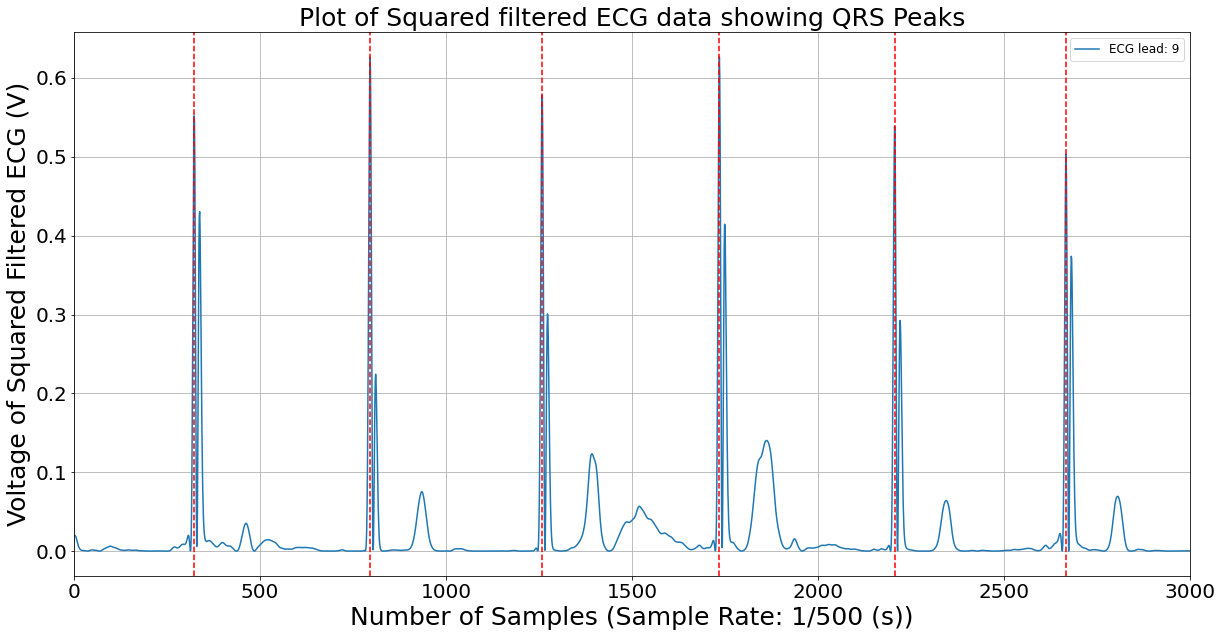

In [78]:
_, rpeaks = nk.ecg_peaks(y, sampling_rate=500)
plot = nk.events_plot(rpeaks['ECG_R_Peaks'],q)
plt.title('Plot of Squared filtered ECG data showing QRS Peaks', fontsize = 25)
plt.xlabel('Number of Samples (Sample Rate: 1/500 (s))', fontsize = 25)
plt.ylabel('Voltage of Squared Filtered ECG (V)', fontsize= 25)
plt.xlim([0,3000])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(['ECG lead: 9'], loc='upper right', prop={'size': 12})
plt.grid()

# The code below plots 3 separate graphs using the same idea above, to determine the R peaks in each QRS complex, but this time using the orignal filtered data, the zooming in on the first two complexes, then the last plot is only the red dotted R peak detection lines to visualize the detection that is occuring.

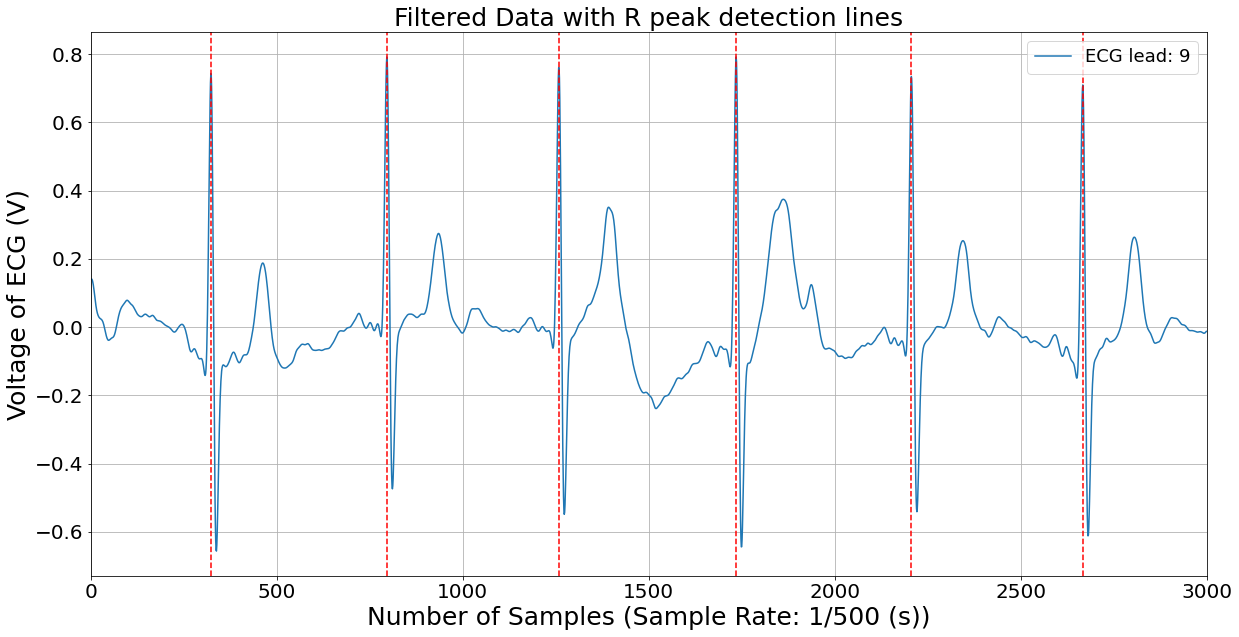

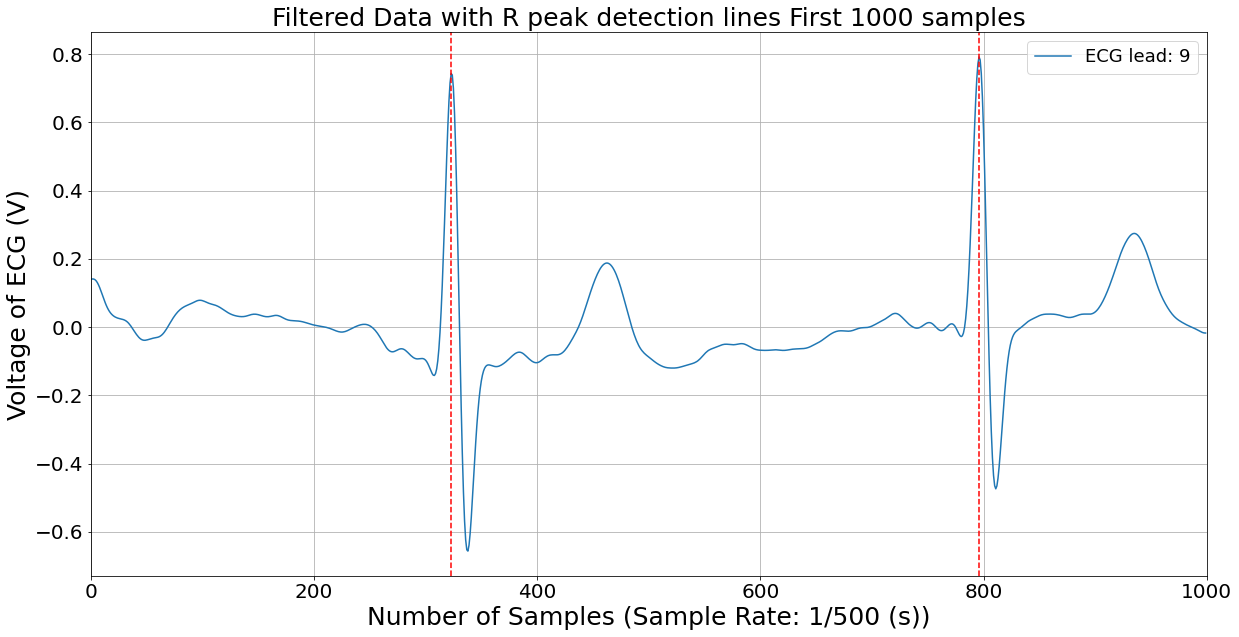

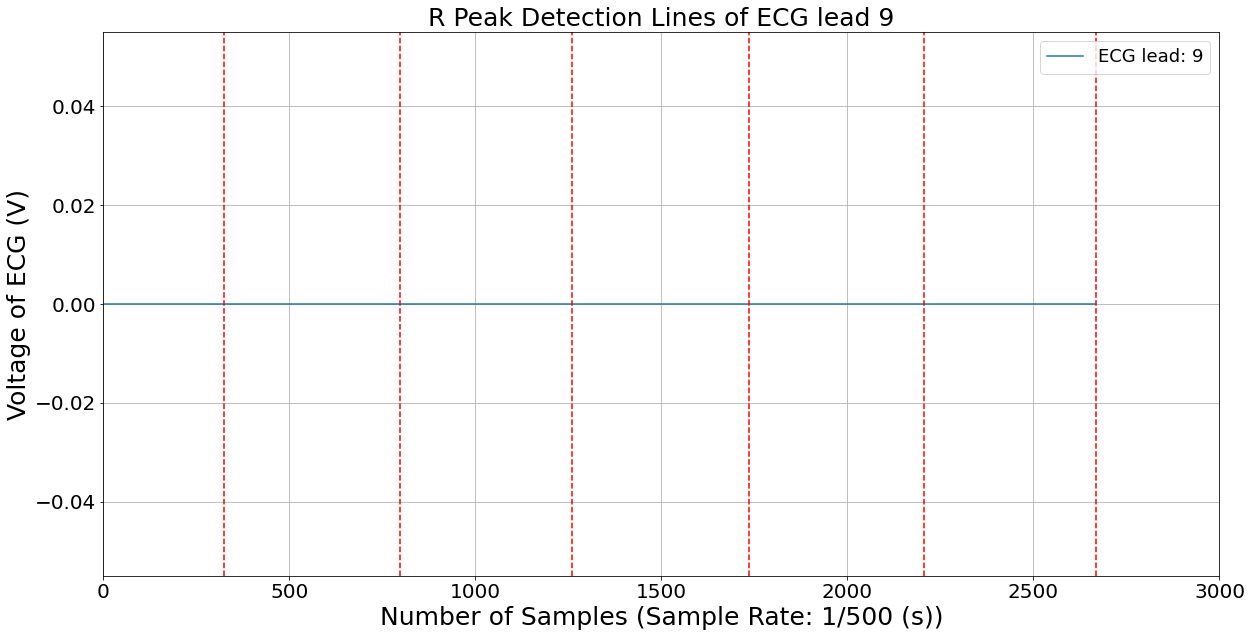

In [81]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], y)
plt.title('Filtered Data with R peak detection lines', fontsize = 25)
plt.xlabel('Number of Samples (Sample Rate: 1/500 (s))', fontsize = 25)
plt.ylabel('Voltage of ECG (V)', fontsize= 25)
plt.xlim([0,3000])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid()
plt.legend(['ECG lead: 9'], loc='upper right', prop={'size': 18})
plt.rcParams['figure.figsize'] = [20, 10]

# Zooming into the first 2 R-peaks
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:2], y[:1000])
plt.title('Filtered Data with R peak detection lines First 1000 samples', fontsize = 25)
plt.xlabel('Number of Samples (Sample Rate: 1/500 (s))', fontsize = 25)
plt.ylabel('Voltage of ECG (V)', fontsize= 25)
plt.xlim([0,1000])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid()
plt.legend(['ECG lead: 9'], loc='best', prop={'size': 18})
plt.rcParams['figure.figsize'] = [20, 10]

plot = nk.events_plot(rpeaks['ECG_R_Peaks'])
plt.title('R Peak Detection Lines of ECG lead 9', fontsize = 25)
plt.xlabel('Number of Samples (Sample Rate: 1/500 (s))', fontsize = 25)
plt.ylabel('Voltage of ECG (V)', fontsize= 25)
plt.xlim([0,3000])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid()
plt.legend(['ECG lead: 9'], loc='upper right', prop={'size': 18})
plt.rcParams['figure.figsize'] = [20, 10]


# Below is a calculation and print out of the Heart Rate based on the peak to peak distance of the QRS complexes.

In [63]:
ecg_rate = nk.signal_rate(rpeaks, sampling_rate=500)

In [89]:
print("the heart rates between peaks are: %s bpm" %ecg_rate)

the heart rates between peaks are: [64.02048656 63.55932203 64.79481641 62.89308176 63.82978723 65.07592191] bpm


In [90]:
# To get a single heart rate, an average of the found peak to peak rates are used
def Average(ecg_rate):
    return sum(ecg_rate) / len(ecg_rate)
  

average = Average(ecg_rate)
print(" The heart rate is: ", round(average,2), "bpm")

 The heart rate is:  64.03 bpm


In [91]:
#Citation for Use of NeuroKit:

#@article{Makowski2021neurokit,
#  author = {Makowski, Dominique and Pham, Tam and Lau, Zen J. and Brammer, Jan C. and Lespinasse, Fran{\c{c}}ois and Pham, Hung and Sch{\"o}lzel, Christopher and Chen, S. H. Annabel},
#  title={NeuroKit2: A Python toolbox for neurophysiological signal processing},
#  journal={Behavior Research Methods},
#  year={2021},
#  month={Feb},
#  day={02},
#  abstract={NeuroKit2 is an open-source, community-driven, and user-centered Python package for neurophysiological signal processing. It provides a comprehensive suite of processing routines for a variety of bodily signals (e.g., ECG, PPG, EDA, EMG, RSP). These processing routines include high-level functions that enable data processing in a few lines of code using validated pipelines, which we illustrate in two examples covering the most typical scenarios, such as an event-related paradigm and an interval-related analysis. The package also includes tools for specific processing steps such as rate extraction and filtering methods, offering a trade-off between high-level convenience and fine-tuned control. Its goal is to improve transparency and reproducibility in neurophysiological research, as well as foster exploration and innovation. Its design philosophy is centred on user-experience and accessibility to both novice and advanced users.},
#  issn={1554-3528},
#  doi={10.3758/s13428-020-01516-y},
#  url={https://doi.org/10.3758/s13428-020-01516-y}
#}